In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Lets check the column details which were given

In [144]:
def_df = pd.read_excel("Data_Dictionary.xlsx")

In [145]:
# # to show all columns and rows
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_colwidth', None)

In [146]:
def_df

LoanStatNew                                                                                                                                                                                                         Description
0                    acc_now_delinq                                                                                                                                                     The number of accounts on which the borrower is now delinquent.
1              acc_open_past_24mths                                                                                                                                                                          Number of trades opened in past 24 months.
2                        addr_state                                                                                                                                                          The state provided by the borrower in the loan application
3                          all_util                                                                                                                                                                               Balance to credit limit on all trades
4                        annual_inc                                                                                                                                       The self-reported annual income provided by the borrower during registration.
5                  annual_inc_joint                                                                                                                           The combined self-reported annual income provided by the co-borrowers during registration
6                  application_type                                                                                                                Indicates whether the loan is an individual application or a joint application with two co-borrowers
7                       avg_cur_bal                                                                                                                                                                             Average current balance of all accounts
8                    bc_open_to_buy                                                                                                                                                                           Total open to buy on revolving bankcards.
9                           bc_util                                                                                                                               Ratio of total current balance to high credit/credit limit for all bankcard accounts.
10         chargeoff_within_12_mths                                                                                                                                                                              Number of charge-offs within 12 months
11          collection_recovery_fee                                                                                                                                                                                      post charge off collection fee
12       collections_12_mths_ex_med                                                                                                                                                    Number of collections in 12 months excluding medical collections
13                      delinq_2yrs                                                                                                        The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
14                      delinq_amnt                                                                                                                                  The past-due amount owed for the accounts on which the borrower is now delinquent.
15                             desc                     

In [147]:
# Convert to dictionary
loanstat_dict = dict(zip(def_df["LoanStatNew"], def_df["Description"]))

print(loanstat_dict)

{'acc_now_delinq': 'The number of accounts on which the borrower is now delinquent.', 'acc_open_past_24mths': 'Number of trades opened in past 24 months.', 'addr_state': 'The state provided by the borrower in the loan application', 'all_util': 'Balance to credit limit on all trades', 'annual_inc': 'The self-reported annual income provided by the borrower during registration.', 'annual_inc_joint': 'The combined self-reported annual income provided by the co-borrowers during registration', 'application_type': 'Indicates whether the loan is an individual application or a joint application with two co-borrowers', 'avg_cur_bal': 'Average current balance of all accounts', 'bc_open_to_buy': 'Total open to buy on revolving bankcards.', 'bc_util': 'Ratio of total current balance to high credit/credit limit for all bankcard accounts.', 'chargeoff_within_12_mths': 'Number of charge-offs within 12 months', 'collection_recovery_fee': 'post charge off collection fee', 'collections_12_mths_ex_med': '

The above output shows the columns available in the given dataset and their overview. However, we see the last two columns without a name and partial description.

## Let's check the dataset and understand the description given above

In [148]:
df = pd.read_csv("loan.csv")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11544\2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [149]:
df.shape

(39717, 111)

In [150]:
df.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade                 emp_title emp_length home_ownership  annual_inc verification_status issue_d  loan_status pymnt_plan                                                               url                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            desc         purpose                 title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0  1077501    1296599       5000         5000           4975.0   36 months   10.65%       162.87     B        B2                       NaN  10+ years           RENT     24000.0            Verified  Dec-11   Fully Paid          n  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>     credit_card              Computer    860xx         AZ  27.65            0           Jan-85               1   
1  1077430    1314167       2500         2500           2500.0   60 months   15.27%        59.83     C        C4                     Ryder   < 1 year           RENT     30000.0     Source Verified  Dec-11  Charged Off          n  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>             car                  bike    309xx         GA   1.00            0           Apr-99               5   
2  1077175    1313524       2400         2400           2400.0   36 months   15.96%        84.33     C        C5                       NaN  10+ years           RENT     12252.0        Not Verified  Dec-11   Fully Paid          n  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             NaN  small_business  real estate business    606xx         IL   8.72            0           Nov-01               2   
3  1

In [151]:
df.describe()

id     member_id     loan_amnt   funded_amnt  funded_amnt_inv   installment    annual_inc           dti   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record      open_acc       pub_rec      revol_bal     total_acc     out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee    recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000     39717.000000  39717.000000  3.971700e+04  39717.000000  39717.000000    39717.000000            14035.000000             2786.000000  39717.000000  39717.000000   39717.000000  39717.000000  39717.000000   39717.000000  39717.000000     39717.000000     39717.000000   39717.000000        39717.000000  39717.000000             39717.000000     39717.000000                     39661.0                          0.0      39717.0               0.0        0.0                        0.0         39717.0           0.0          0.0          0.0         0.0          0.0          0.0                 0.0           0.0      0.0          0.0          0.0         0.0       0.0               0.0     0.0          0.0           0.0                   0.0          0.0             0.0      0.0                   39661.0      39717.0                 0.0                   0.0                    0.0             0.0       0.0   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196     10397.448868    324.561922  6.896893e+04     13.315130      0.146512        0.869200               35.900962               69.698134      9.294408      0.055065   13382.528086     22.088828     51.227887      50.989768  12153.596544     11567.149118      9793.348813    2263.663172            1.363015     95.221624                12.406112      2678.826162                         0.0                          NaN          1.0               NaN        NaN                        NaN             0.0           NaN          NaN          NaN         NaN          NaN          NaN                 NaN           NaN      NaN          NaN          NaN         NaN       NaN               NaN     NaN          NaN           NaN                   NaN          NaN             NaN      NaN                       0.0          0.0                 NaN                   NaN                    NaN             NaN       NaN   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670      7128.450439    208.874874  6.379377e+04      6.678594      0.491812        1.070219               22.020060               43.822529      4.400282      0.237200   15885.016641     11.401709    375.172839     373.824457   9042.040766      8942.672613      7065.522127    2608.111964            7.289979    688.744771               148.671593      4447.136012                         0.0                          NaN          0.0               NaN        NaN                        NaN             0.0           NaN          NaN          NaN         NaN          NaN          NaN                 NaN           NaN      NaN          NaN          NaN         NaN       NaN               NaN     NaN          NaN           NaN                   NaN          NaN             NaN      NaN                       0.0          0.0                 NaN                   NaN                    NaN             NaN       NaN   
min    5.473400e+04  7.069900e+04    500.000000    500.000000         0.000000     15.690000 

Looking at the output using describe, we can see there are few columns which have many null values, as the count of them is very low than than the actual row count.

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Seeing the above output its not clear about individual column types. Lets check individual column types

In [153]:
original_columns = [i for i in df.columns]
print(original_columns)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [154]:
missing_cols = [x for x in def_df["LoanStatNew"] if x not in original_columns]

In [155]:
missing_cols

['fico_range_high',
 'fico_range_low',
 'last_fico_range_high',
 'last_fico_range_low',
 'total_rev_hi_lim \xa0',
 'verified_status_joint',
 nan,
 nan]

The above columns doesn't exist in the actual data provided.

In [156]:
total_rows = df.shape[0]

In [157]:
full_null_columns = []
full_unique_columns = []
for key in original_columns:
    null_count = df[key].isnull().sum()
    unique_count = df[key].nunique()
    if null_count == total_rows:
        full_null_columns.append(key)
    elif unique_count == 1:
        full_unique_columns.append(key)

In [158]:
full_null_columns

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [159]:
full_unique_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [161]:
df.drop(columns=full_null_columns, inplace=True)

In [162]:
df.drop(columns=full_unique_columns, inplace=True)

In [163]:
df.shape

(39717, 48)

All the columns which have only null values and which have only one unique value have been removed from analysis as they doesnt contribute much.

# Checking the remaining columns

## Finding numerical cols and categorical cols

In [164]:
df.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade                 emp_title emp_length home_ownership  annual_inc verification_status issue_d  loan_status                                                               url                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            desc         purpose                 title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0  1077501    1296599       5000         5000           4975.0   36 months   10.65%       162.87     B        B2                       NaN  10+ years           RENT     24000.0            Verified  Dec-11   Fully Paid  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>     credit_card              Computer    860xx         AZ  27.65            0           Jan-85               1   
1  1077430    1314167       2500         2500           2500.0   60 months   15.27%        59.83     C        C4                     Ryder   < 1 year           RENT     30000.0     Source Verified  Dec-11  Charged Off  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>             car                  bike    309xx         GA   1.00            0           Apr-99               5   
2  1077175    1313524       2400         2400           2400.0   36 months   15.96%        84.33     C        C5                       NaN  10+ years           RENT     12252.0        Not Verified  Dec-11   Fully Paid  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             NaN  small_business  real estate business    606xx         IL   8.72            0           Nov-01               2   
3  1076863    1277178      10000        10000   

In [169]:
#list of unique variables per column
print(df.nunique())

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26526
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec   

As we can see, id, member_id, url have no repititive values, and hence, they doesn't contribute much to the analysis. Hence removing them

In [170]:
df.drop(columns=["id","member_id","url"],inplace=True)

In [171]:
df.nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
desc                       26526
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc 

In [173]:
df.shape

(39717, 45)

In [175]:
df.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment    annual_inc           dti   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record      open_acc       pub_rec      revol_bal     total_acc     out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee    recoveries  collection_recovery_fee  last_pymnt_amnt  pub_rec_bankruptcies
count  39717.000000  39717.000000     39717.000000  39717.000000  3.971700e+04  39717.000000  39717.000000    39717.000000            14035.000000             2786.000000  39717.000000  39717.000000   39717.000000  39717.000000  39717.000000   39717.000000  39717.000000     39717.000000     39717.000000   39717.000000        39717.000000  39717.000000             39717.000000     39717.000000          39020.000000
mean   11219.443815  10947.713196     10397.448868    324.561922  6.896893e+04     13.315130      0.146512        0.869200               35.900962               69.698134      9.294408      0.055065   13382.528086     22.088828     51.227887      50.989768  12153.596544     11567.149118      9793.348813    2263.663172            1.363015     95.221624                12.406112      2678.826162              0.043260
std     7456.670694   7187.238670      7128.450439    208.874874  6.379377e+04      6.678594      0.491812        1.070219               22.020060               43.822529      4.400282      0.237200   15885.016641     11.401709    375.172839     373.824457   9042.040766      8942.672613      7065.522127    2608.111964            7.289979    688.744771               148.671593      4447.136012              0.204324
min      500.000000    500.000000         0.000000     15.690000  4.000000e+03      0.000000      0.000000        0.000000                0.000000                0.000000      2.000000      0.000000       0.000000      2.000000      0.000000       0.000000      0.000000         0.000000         0.000000       0.000000            0.000000      0.000000                 0.000000         0.000000              0.000000
25%     5500.000000   5400.000000      5000.000000    167.020000  4.040400e+04      8.170000      0.000000        0.000000               18.000000               22.000000      6.000000      0.000000    3703.000000     13.000000      0.000000       0.000000   5576.930000      5112.310000      4600.000000     662.180000            0.000000      0.000000                 0.000000       218.680000              0.000000
50%    10000.000000   9600.000000      8975.000000    280.220000  5.900000e+04     13.400000      0.000000        1.000000               34.000000               90.000000      9.000000      0.000000    8850.000000     20.000000      0.000000       0.000000   9899.640319      9287.150000      8000.000000    1348.910000            0.000000      0.000000                 0.000000       546.140000              0.000000
75%    15000.000000  15000.000000     14400.000000    430.780000  8.230000e+04     18.600000      0.000000        1.000000               52.000000              104.000000     12.000000      0.000000   17058.000000     29.000000      0.000000       0.000000  16534.433040     15798.810000     13653.260000    2833.400000            0.000000      0.000000                 0.000000      3293.160000              0.000000
max    35000.000000  35000.000000     35000.000000   1305.190000  6.000000e+06     29.990000     11.000000        8.000000              120.000000              129.000000     44.000000      4.000000  149588.000000     90.000000   6311.470000    6307.370000  58563.679930     58563.680000     35000.020000   23563.680000          180.200000  29623.350000              7002.190000     36115.200000              2.000000

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [180]:
for i in df.columns:
        print(i, "--" , loanstat_dict[i], "--", df[i].dtype, "--", df[i].nunique(), "--", df[i][0])

loan_amnt -- The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. -- int64 -- 885 -- 5000
funded_amnt -- The total amount committed to that loan at that point in time. -- int64 -- 1041 -- 5000
funded_amnt_inv -- The total amount committed by investors for that loan at that point in time. -- float64 -- 8205 -- 4975.0
term -- The number of payments on the loan. Values are in months and can be either 36 or 60. -- object -- 2 --  36 months
int_rate -- Interest Rate on the loan -- object -- 371 -- 10.65%
installment -- The monthly payment owed by the borrower if the loan originates. -- float64 -- 15383 -- 162.87
grade -- LC assigned loan grade -- object -- 7 -- B
sub_grade -- LC assigned loan subgrade -- object -- 35 -- B2
emp_title -- The job title supplied by the Borrower when applying for the loan.* -- object -- 28820 -- nan
emp_length -- Employment length in years. Pos

From the above output, we are assuming the features are categorical and continuous

In [194]:
# Categorical features
categorical_features = [
    "term", "grade", "sub_grade", "emp_title", "emp_length", "home_ownership", 
    "verification_status", "issue_d", "loan_status", "desc", "purpose", "title", 
    "zip_code", "addr_state", "earliest_cr_line", "revol_util", 
    "next_pymnt_d", "last_credit_pull_d", "last_pymnt_d"
]

# Continuous features
continuous_features = [
    "loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", 
    "annual_inc", "dti", "delinq_2yrs", "inq_last_6mths", "mths_since_last_delinq", 
    "mths_since_last_record", "open_acc", "pub_rec", "revol_bal", "total_acc", 
    "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", 
    "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", 
    "collection_recovery_fee", "last_pymnt_amnt", "pub_rec_bankruptcies"
]

print(len(categorical_features)+len(continuous_features))

45


In [188]:
df.head(1)

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade emp_title emp_length home_ownership  annual_inc verification_status issue_d loan_status                                                                            desc      purpose     title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  pub_rec_bankruptcies
0       5000         5000           4975.0   36 months   10.65%       162.87     B        B2       NaN  10+ years           RENT     24000.0            Verified  Dec-11  Fully Paid    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>  credit_card  Computer    860xx         AZ  27.65            0           Jan-85               1                     NaN                     NaN         3        0      13648     83.70%          9        0.0            0.0  5863.155187          5833.84           5000.0         863.16                 0.0         0.0                      0.0       Jan-15           171.62          NaN             May-16                   0.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11544\4027048618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="term", palette="viridis")


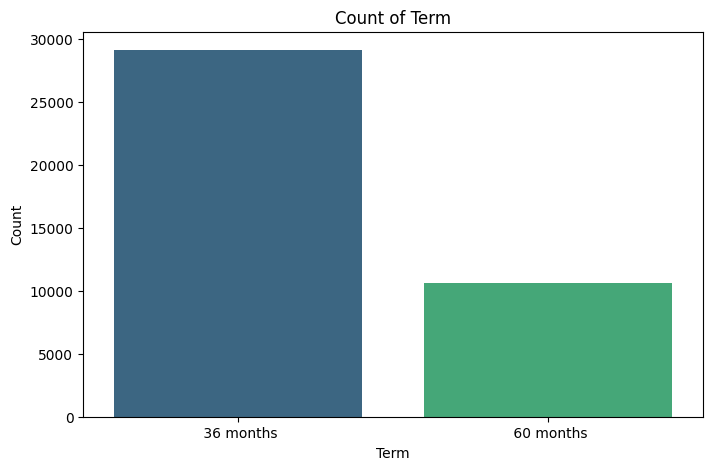

In [191]:
# Bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="term", palette="viridis")
plt.title("Count of Term")
plt.xlabel("Term")
plt.ylabel("Count")
plt.show()

In [202]:
df[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 39717 non-null  object
 1   grade                39717 non-null  object
 2   sub_grade            39717 non-null  object
 3   emp_title            37258 non-null  object
 4   emp_length           38642 non-null  object
 5   home_ownership       39717 non-null  object
 6   verification_status  39717 non-null  object
 7   issue_d              39717 non-null  object
 8   loan_status          39717 non-null  object
 9   desc                 26775 non-null  object
 10  purpose              39717 non-null  object
 11  title                39706 non-null  object
 12  zip_code             39717 non-null  object
 13  addr_state           39717 non-null  object
 14  earliest_cr_line     39717 non-null  object
 15  revol_util           39667 non-null  object
 16  next

In [203]:
df[categorical_features].nunique()

term                       2
grade                      7
sub_grade                 35
emp_title              28820
emp_length                11
home_ownership             5
verification_status        3
issue_d                   55
loan_status                3
desc                   26526
purpose                   14
title                  19615
zip_code                 823
addr_state                50
earliest_cr_line         526
revol_util              1089
next_pymnt_d               2
last_credit_pull_d       106
last_pymnt_d             101
dtype: int64

As the features with values more than 15 would be hard to read in a subplot, we will plot them solo later

In [204]:
low_cardinal_categorical_features = [x for x in categorical_features if df[x].nunique() <= 15]
high_cardinal_categorical_features = [x for x in categorical_features if df[x].nunique() > 15]

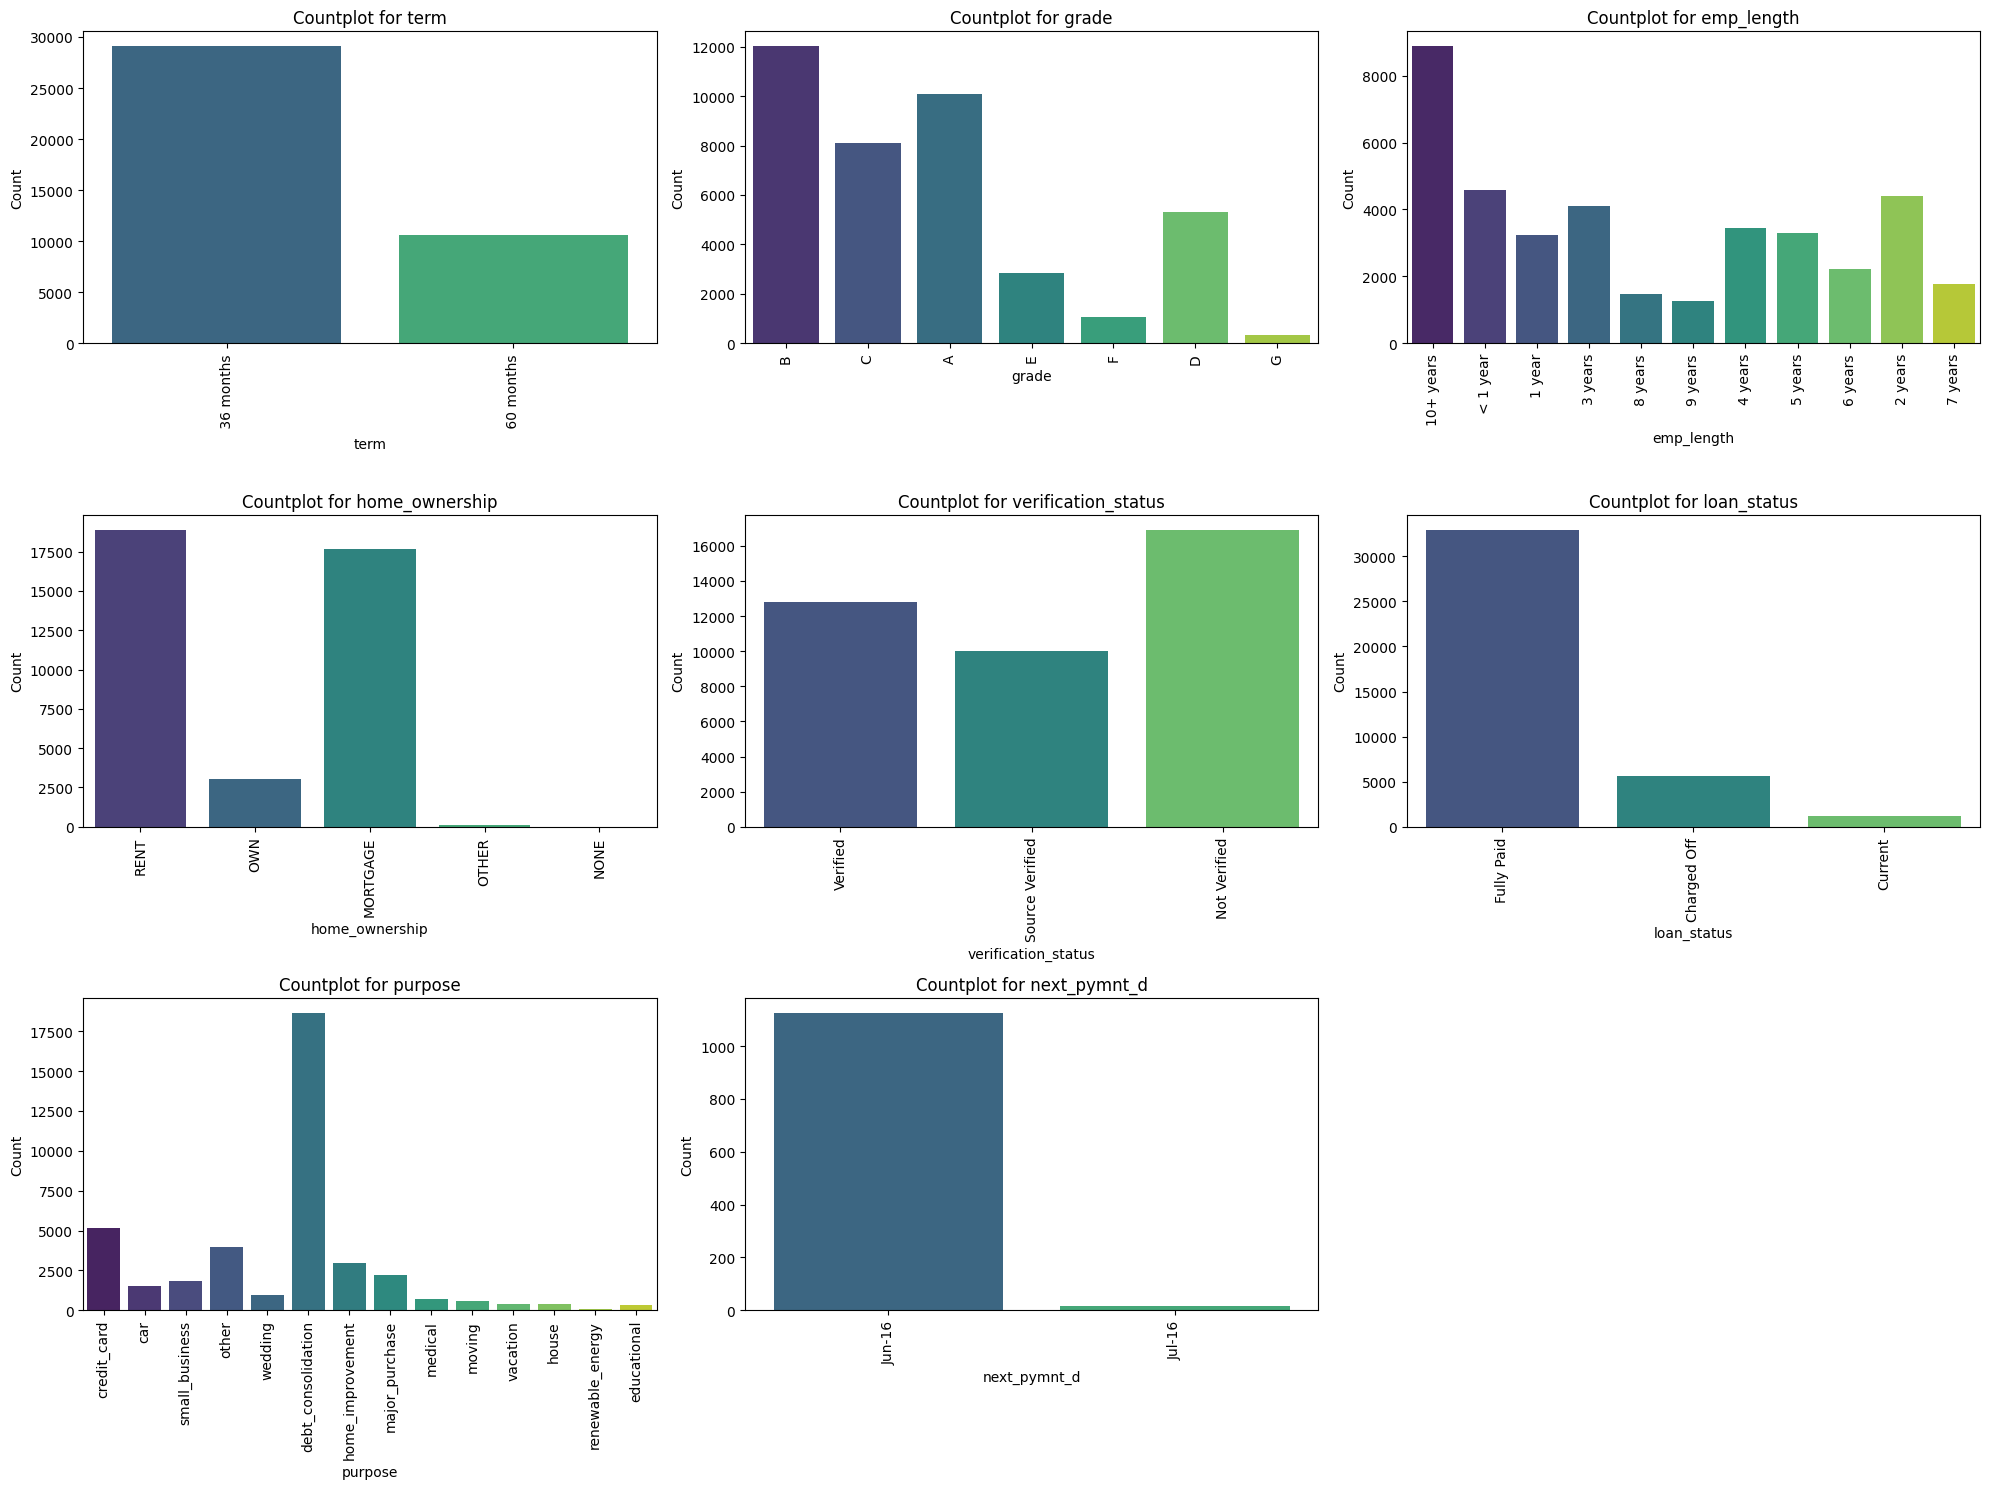

In [213]:
# Calculate the optimal number of rows and columns for the subplots
n_rows = int(np.ceil(np.sqrt(len(low_cardinal_categorical_features))))
n_cols = int(np.ceil(len(low_cardinal_categorical_features) / n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, feature in enumerate(low_cardinal_categorical_features):
    sns.countplot(data=df, x=feature, palette="viridis", ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Countplot for {feature}")  # Optional: Add subplot titles

# Remove any empty subplots
for i in range(len(low_cardinal_categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Improve layout for better readability

plt.savefig('first.png', dpi=300)

plt.show()

#### The following observations can be made from the above.
1. Most people prefer 36 months tenure rather than 60 months
2. Grade - B is the highest.
3. Employee experience 10+ years, preferably take loans.
4. Home status of loan applicants - Rent is top followed by Mortgage.
5. Verification status - Not verified is highest followed by verified and source verified. But cumulative of verified is more than not verrified
6. Loan status fully paid is way more than charged off and current
7. People take loans for the purpose of debt_consolidation followed by home_improvement
8. There are only two dates available in the dataset for next payment date, hence we can ignore that further in the analysis

sub_grade, issue_d, addr_state, last_credit_pull_d, last_pymnt_d

In [221]:
df["sub_grade"].value_counts()

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

In [222]:
df["issue_d"].value_counts()

issue_d
Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
Aug-08      71
May-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [229]:
df["addr_state"].value_counts()

addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

CA and NY are topping the list in loan

In [230]:
df[["addr_state","zip_code"]].value_counts()

addr_state  zip_code
NY          100xx       597
CA          945xx       544
NY          112xx       515
IL          606xx       503
NJ          070xx       472
                       ... 
AL          369xx         1
AR          711xx         1
AK          363xx         1
            352xx         1
WY          831xx         1
Name: count, Length: 897, dtype: int64

NY - 100xx tops the list on a zip code basis

In [224]:
df["last_credit_pull_d"].value_counts()

last_credit_pull_d
May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
Jan-16      657
Dec-15      647
Mar-13      577
Mar-14      564
Dec-14      562
Jul-14      555
Sep-14      546
Jul-15      535
Feb-14      531
Oct-14      529
Nov-15      529
Aug-14      522
Jan-14      516
Sep-15      512
Oct-15      502
Nov-14      497
Apr-14      494
Nov-13      473
May-14      473
Jun-14      466
May-13      448
Jan-15      440
Apr-13      425
May-15      423
Aug-15      422
Dec-13      422
Oct-13      416
Nov-12      404
Jul-13      396
Sep-12      391
Sep-13      390
Apr-15      388
Aug-12      377
Jun-15      375
Dec-12      374
Mar-15      371
Aug-13      370
Jun-13      370
Feb-12      368
Feb-15      358
Mar-12      338
Oct-12      332
May-12      324
Jun-12      308
Apr-12      308
Jul-12      297
Jan-12      258
Mar-11      257
Aug-11      254
Dec-11      245
Nov-11      201
May-11      193
Jun-11      165
Sep-11      157
Jul-11      156
Feb-11      151
Oct-1

In [226]:
df["last_pymnt_d"].value_counts()

last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Jan-14     832
Aug-12     832
Aug-14     832
Oct-12     826
Mar-14     824
Jul-14     820
Oct-14     808
Feb-14     792
Jan-13     784
Dec-13     780
Jun-14     778
Jul-13     776
Sep-12     761
Jul-12     741
Nov-12     740
May-12     736
Feb-12     735
Apr-12     734
Aug-13     727
Dec-12     707
Jun-12     702
Sep-14     693
Oct-13     692
Jun-13     691
Sep-13     684
May-14     682
Apr-14     674
Nov-13     671
Nov-14     589
Jan-12     546
Dec-11     544
Mar-11     488
Nov-11     454
Oct-11     453
Sep-11     450
Aug-11     428
Apr-11     420
Jul-11     394
May-11     386
Jun-11     376
Feb-11     337
Jan-15     332
Jan-11     266
Dec-10     253
Jul-15     250
Nov-15     227
Apr-16     220
Jun-15     220
Mar-16     216
Oct-10     216
Aug-15     210
Sep-15     202
Nov-10     195
Jul-10     188
Oct-15     186
Jan-16     183
Mar-15     182
Sep-10     176
Dec-15     1

# Analysing the continuous columns (Univariate)

In [231]:
df[continuous_features].describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment    annual_inc           dti   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record      open_acc       pub_rec      revol_bal     total_acc     out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee    recoveries  collection_recovery_fee  last_pymnt_amnt  pub_rec_bankruptcies
count  39717.000000  39717.000000     39717.000000  39717.000000  3.971700e+04  39717.000000  39717.000000    39717.000000            14035.000000             2786.000000  39717.000000  39717.000000   39717.000000  39717.000000  39717.000000   39717.000000  39717.000000     39717.000000     39717.000000   39717.000000        39717.000000  39717.000000             39717.000000     39717.000000          39020.000000
mean   11219.443815  10947.713196     10397.448868    324.561922  6.896893e+04     13.315130      0.146512        0.869200               35.900962               69.698134      9.294408      0.055065   13382.528086     22.088828     51.227887      50.989768  12153.596544     11567.149118      9793.348813    2263.663172            1.363015     95.221624                12.406112      2678.826162              0.043260
std     7456.670694   7187.238670      7128.450439    208.874874  6.379377e+04      6.678594      0.491812        1.070219               22.020060               43.822529      4.400282      0.237200   15885.016641     11.401709    375.172839     373.824457   9042.040766      8942.672613      7065.522127    2608.111964            7.289979    688.744771               148.671593      4447.136012              0.204324
min      500.000000    500.000000         0.000000     15.690000  4.000000e+03      0.000000      0.000000        0.000000                0.000000                0.000000      2.000000      0.000000       0.000000      2.000000      0.000000       0.000000      0.000000         0.000000         0.000000       0.000000            0.000000      0.000000                 0.000000         0.000000              0.000000
25%     5500.000000   5400.000000      5000.000000    167.020000  4.040400e+04      8.170000      0.000000        0.000000               18.000000               22.000000      6.000000      0.000000    3703.000000     13.000000      0.000000       0.000000   5576.930000      5112.310000      4600.000000     662.180000            0.000000      0.000000                 0.000000       218.680000              0.000000
50%    10000.000000   9600.000000      8975.000000    280.220000  5.900000e+04     13.400000      0.000000        1.000000               34.000000               90.000000      9.000000      0.000000    8850.000000     20.000000      0.000000       0.000000   9899.640319      9287.150000      8000.000000    1348.910000            0.000000      0.000000                 0.000000       546.140000              0.000000
75%    15000.000000  15000.000000     14400.000000    430.780000  8.230000e+04     18.600000      0.000000        1.000000               52.000000              104.000000     12.000000      0.000000   17058.000000     29.000000      0.000000       0.000000  16534.433040     15798.810000     13653.260000    2833.400000            0.000000      0.000000                 0.000000      3293.160000              0.000000
max    35000.000000  35000.000000     35000.000000   1305.190000  6.000000e+06     29.990000     11.000000        8.000000              120.000000              129.000000     44.000000      4.000000  149588.000000     90.000000   6311.470000    6307.370000  58563.679930     58563.680000     35000.020000   23563.680000          180.200000  29623.350000              7002.190000     36115.200000              2.000000

In [233]:
df[continuous_features].head()

loan_amnt  funded_amnt  funded_amnt_inv int_rate  installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal  total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  pub_rec_bankruptcies
0       5000         5000           4975.0   10.65%       162.87     24000.0  27.65            0               1                     NaN                     NaN         3        0      13648          9       0.00           0.00   5863.155187          5833.84          5000.00         863.16                0.00        0.00                     0.00           171.62                   0.0
1       2500         2500           2500.0   15.27%        59.83     30000.0   1.00            0               5                     NaN                     NaN         3        0       1687          4       0.00           0.00   1008.710000          1008.71           456.46         435.17                0.00      117.08                     1.11           119.66                   0.0
2       2400         2400           2400.0   15.96%        84.33     12252.0   8.72            0               2                     NaN                     NaN         2        0       2956         10       0.00           0.00   3005.666844          3005.67          2400.00         605.67                0.00        0.00                     0.00           649.91                   0.0
3      10000        10000          10000.0   13.49%       339.31     49200.0  20.00            0               1                    35.0                     NaN        10        0       5598         37       0.00           0.00  12231.890000         12231.89         10000.00        2214.92               16.97        0.00                     0.00           357.48                   0.0
4       3000         3000           3000.0   12.69%        67.79     80000.0  17.94            0               0                    38.0                     NaN        15        0      27783         38     524.06         524.06   3513.330000          3513.33          2475.94        1037.39                0.00        0.00                     0.00            67.79                   0.0

In [235]:
df['int_rate'].isnull().sum()

np.int64(0)

In [236]:
df['int_rate']=df['int_rate'].apply(lambda x: float(x.replace('%','').strip()))

In [237]:
df["mths_since_last_delinq"].isnull().sum()

np.int64(25682)

mths_since_last_delinq

for the above columns, NaN might indicate that there were no delinquecy in the entire past.

In [242]:
df["mths_since_last_record"][~df["mths_since_last_record"].isnull()].value_counts()

mths_since_last_record
0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
94.0      55
108.0     55
87.0      54
93.0      54
100.0     53
110.0     53
106.0     53
88.0      53
109.0     52
114.0     51
86.0      51
96.0      51
97.0      51
101.0     50
99.0      50
103.0     49
90.0      49
107.0     48
117.0     47
85.0      47
91.0      44
92.0      44
102.0     43
98.0      42
116.0     41
105.0     40
95.0      40
112.0     39
115.0     37
118.0     36
63.0      15
76.0      15
61.0      14
58.0      13
80.0      12
67.0      11
55.0      11
81.0      11
69.0      11
54.0      10
77.0      10
119.0     10
53.0       9
64.0       9
72.0       9
50.0       9
73.0       9
70.0       8
21.0       8
82.0       8
78.0       7
49.0       7
44.0       7
43.0       7
79.0       7
57.0       7
38.0       7
45.0       6
65.0       6
41.0       6
29.0       6
33.0       6
56.0       6
74.0       6
26.0       6
60.0       6
75.0       6
62.0       6
40.0       6
42.0       6
66

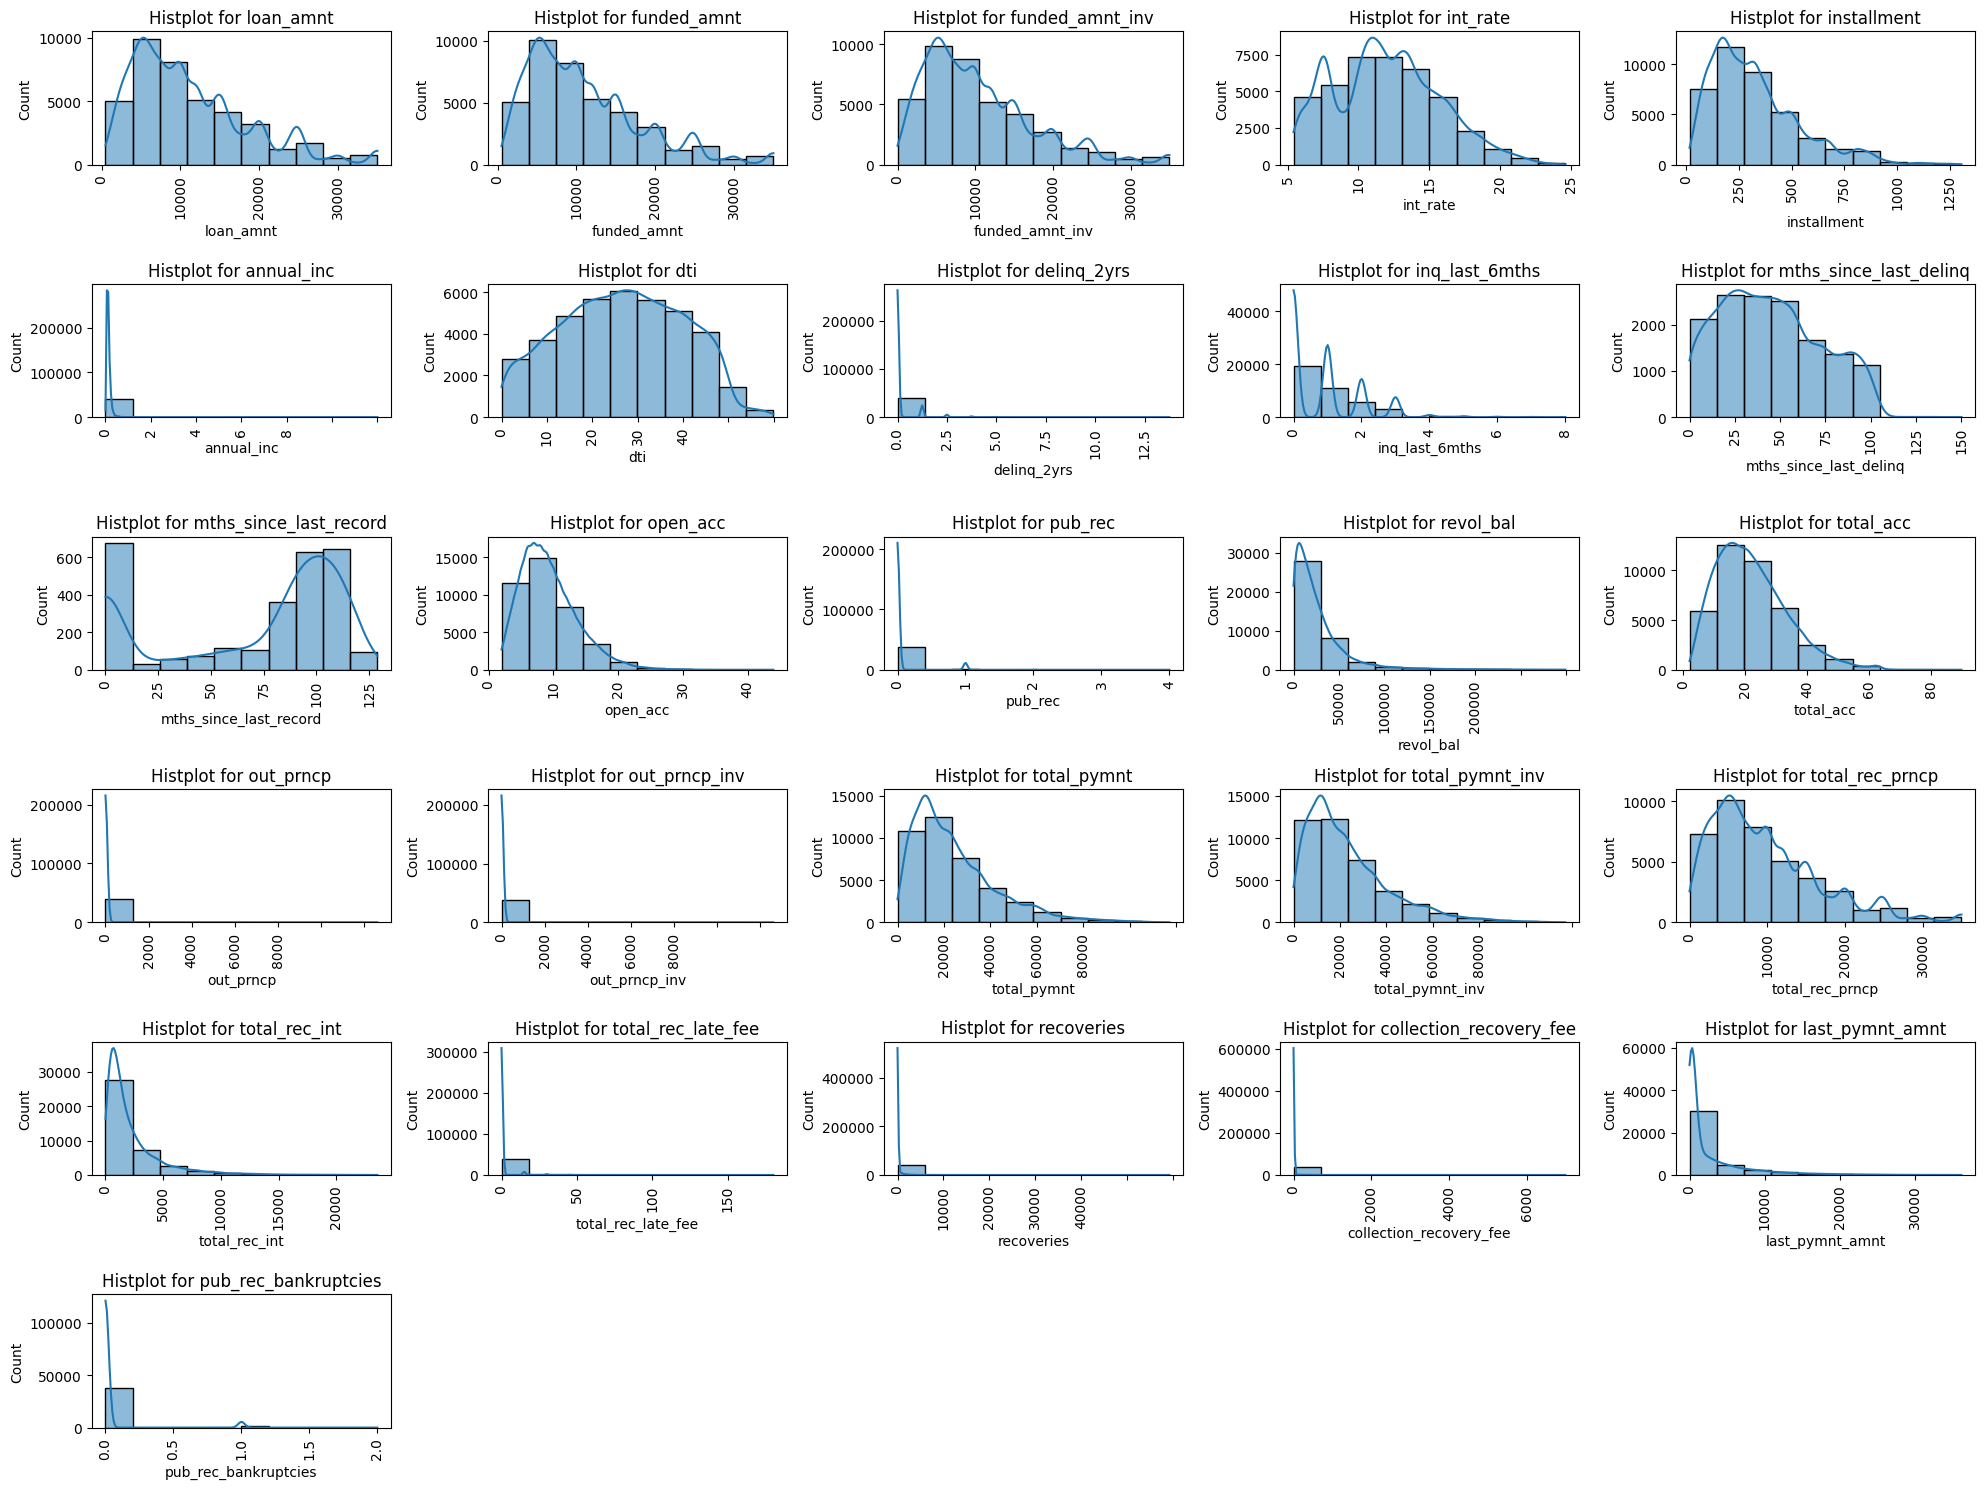

In [243]:
# Calculate the optimal number of rows and columns for the subplots
n_rows = int(np.ceil(np.sqrt(len(continuous_features))))
n_cols = int(np.ceil(len(continuous_features) / n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    sns.histplot(data=df, x=feature, palette="viridis", ax=axes[i], kde=True, bins=10)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel(feature)
    axes[i].set_title(f"Histplot for {feature}")  # Optional: Add subplot titles

# Remove any empty subplots
for i in range(len(continuous_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Improve layout for better readability

plt.savefig('second.png', dpi=300)

plt.show()

Looking at the above graph, there can be outliers present in pub_rec_bankruptcies, collection_recovery_fee, recoveries, total_rec_late_fee, out_prncp_inv, out_prncp, pub_rec, annual_inc. delinq_2yrs

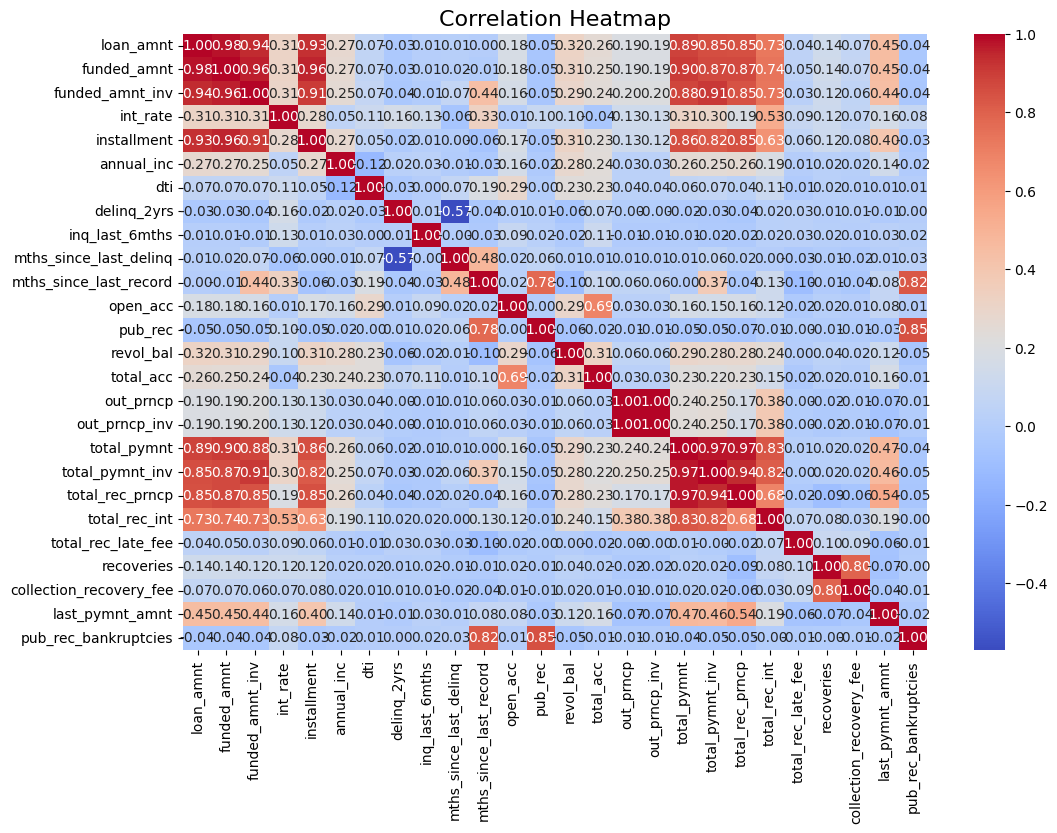

In [245]:
# Compute the correlation matrix
correlation_matrix = df[continuous_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,    # Annotates each cell with the numeric value
    fmt=".2f",     # Format the annotation text
    cmap="coolwarm", # Color palette
    cbar=True      # Show color bar
)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

plt.savefig('Correlation.png', dpi=300)

# Show the plot
plt.show()

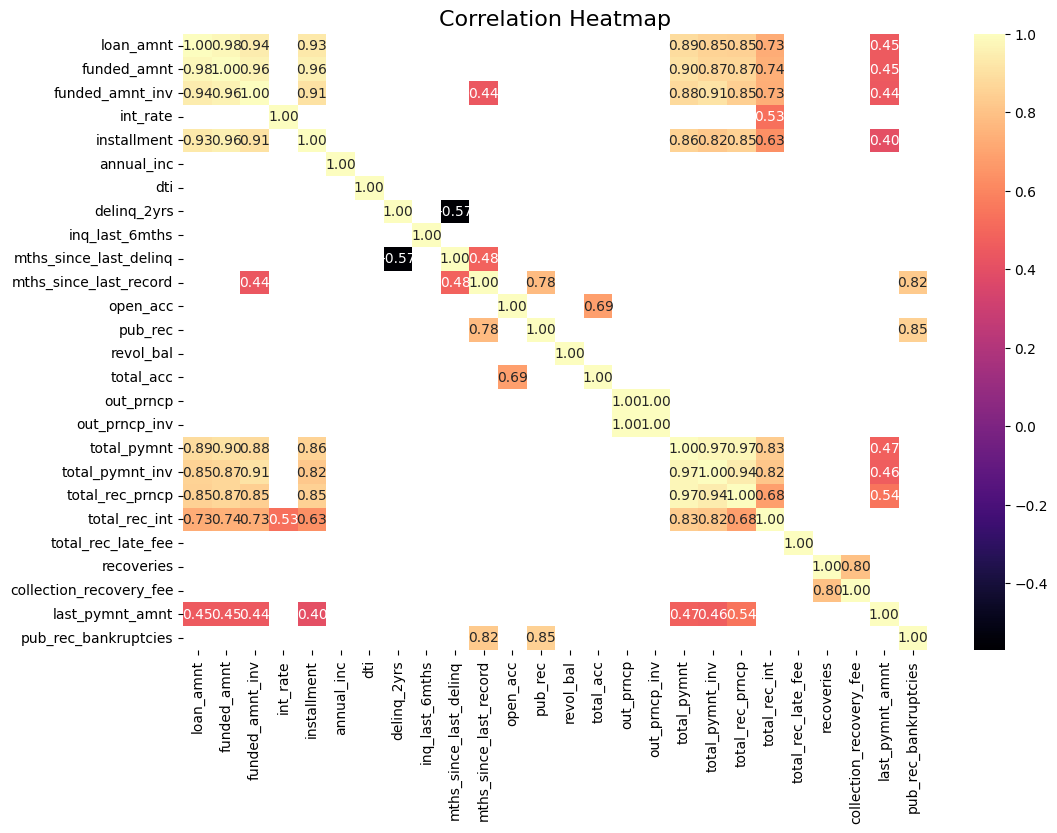

In [294]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

mask = abs(correlation_matrix) < 0.4
# Create a heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,    # Annotates each cell with the numeric value
    mask = mask,
    fmt=".2f",     # Format the annotation text
    cmap="magma", # Color palette
    cbar=True      # Show color bar
)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)

plt.savefig('CorrelationMasked.png', dpi=300)

# Show the plot
plt.show()

From the above masked corr heatmap, it is understood that loan_amnt, funded_amnt, funded_amnt_inv are very positively related



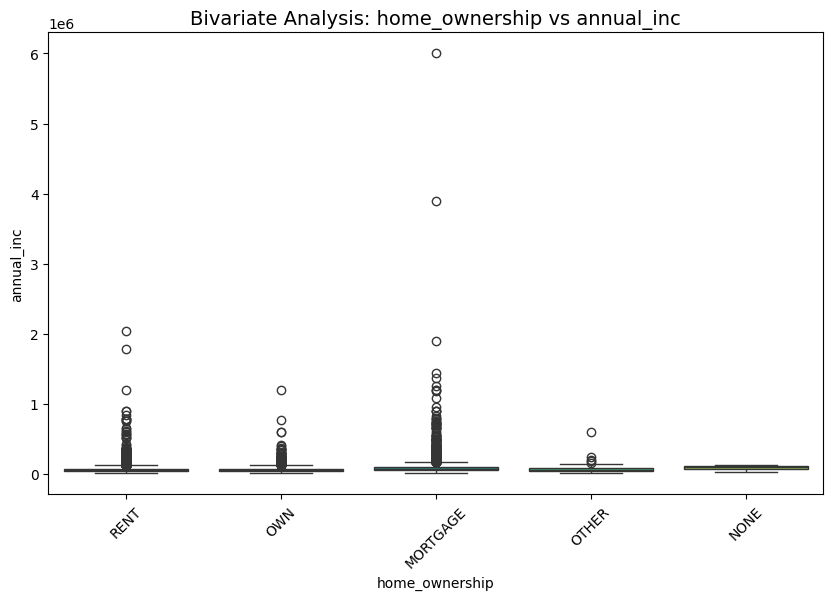

In [250]:
continuous_var = "annual_inc"
categorical_var = "home_ownership"

# Set up the figure
plt.figure(figsize=(10, 6))

# Boxplot for visualizing distribution
sns.boxplot(data=df, x=categorical_var, y=continuous_var, palette="viridis")
plt.title(f"Bivariate Analysis: {categorical_var} vs {continuous_var}", fontsize=14)
plt.xticks(rotation=45)  # Rotate category labels if needed
plt.show()

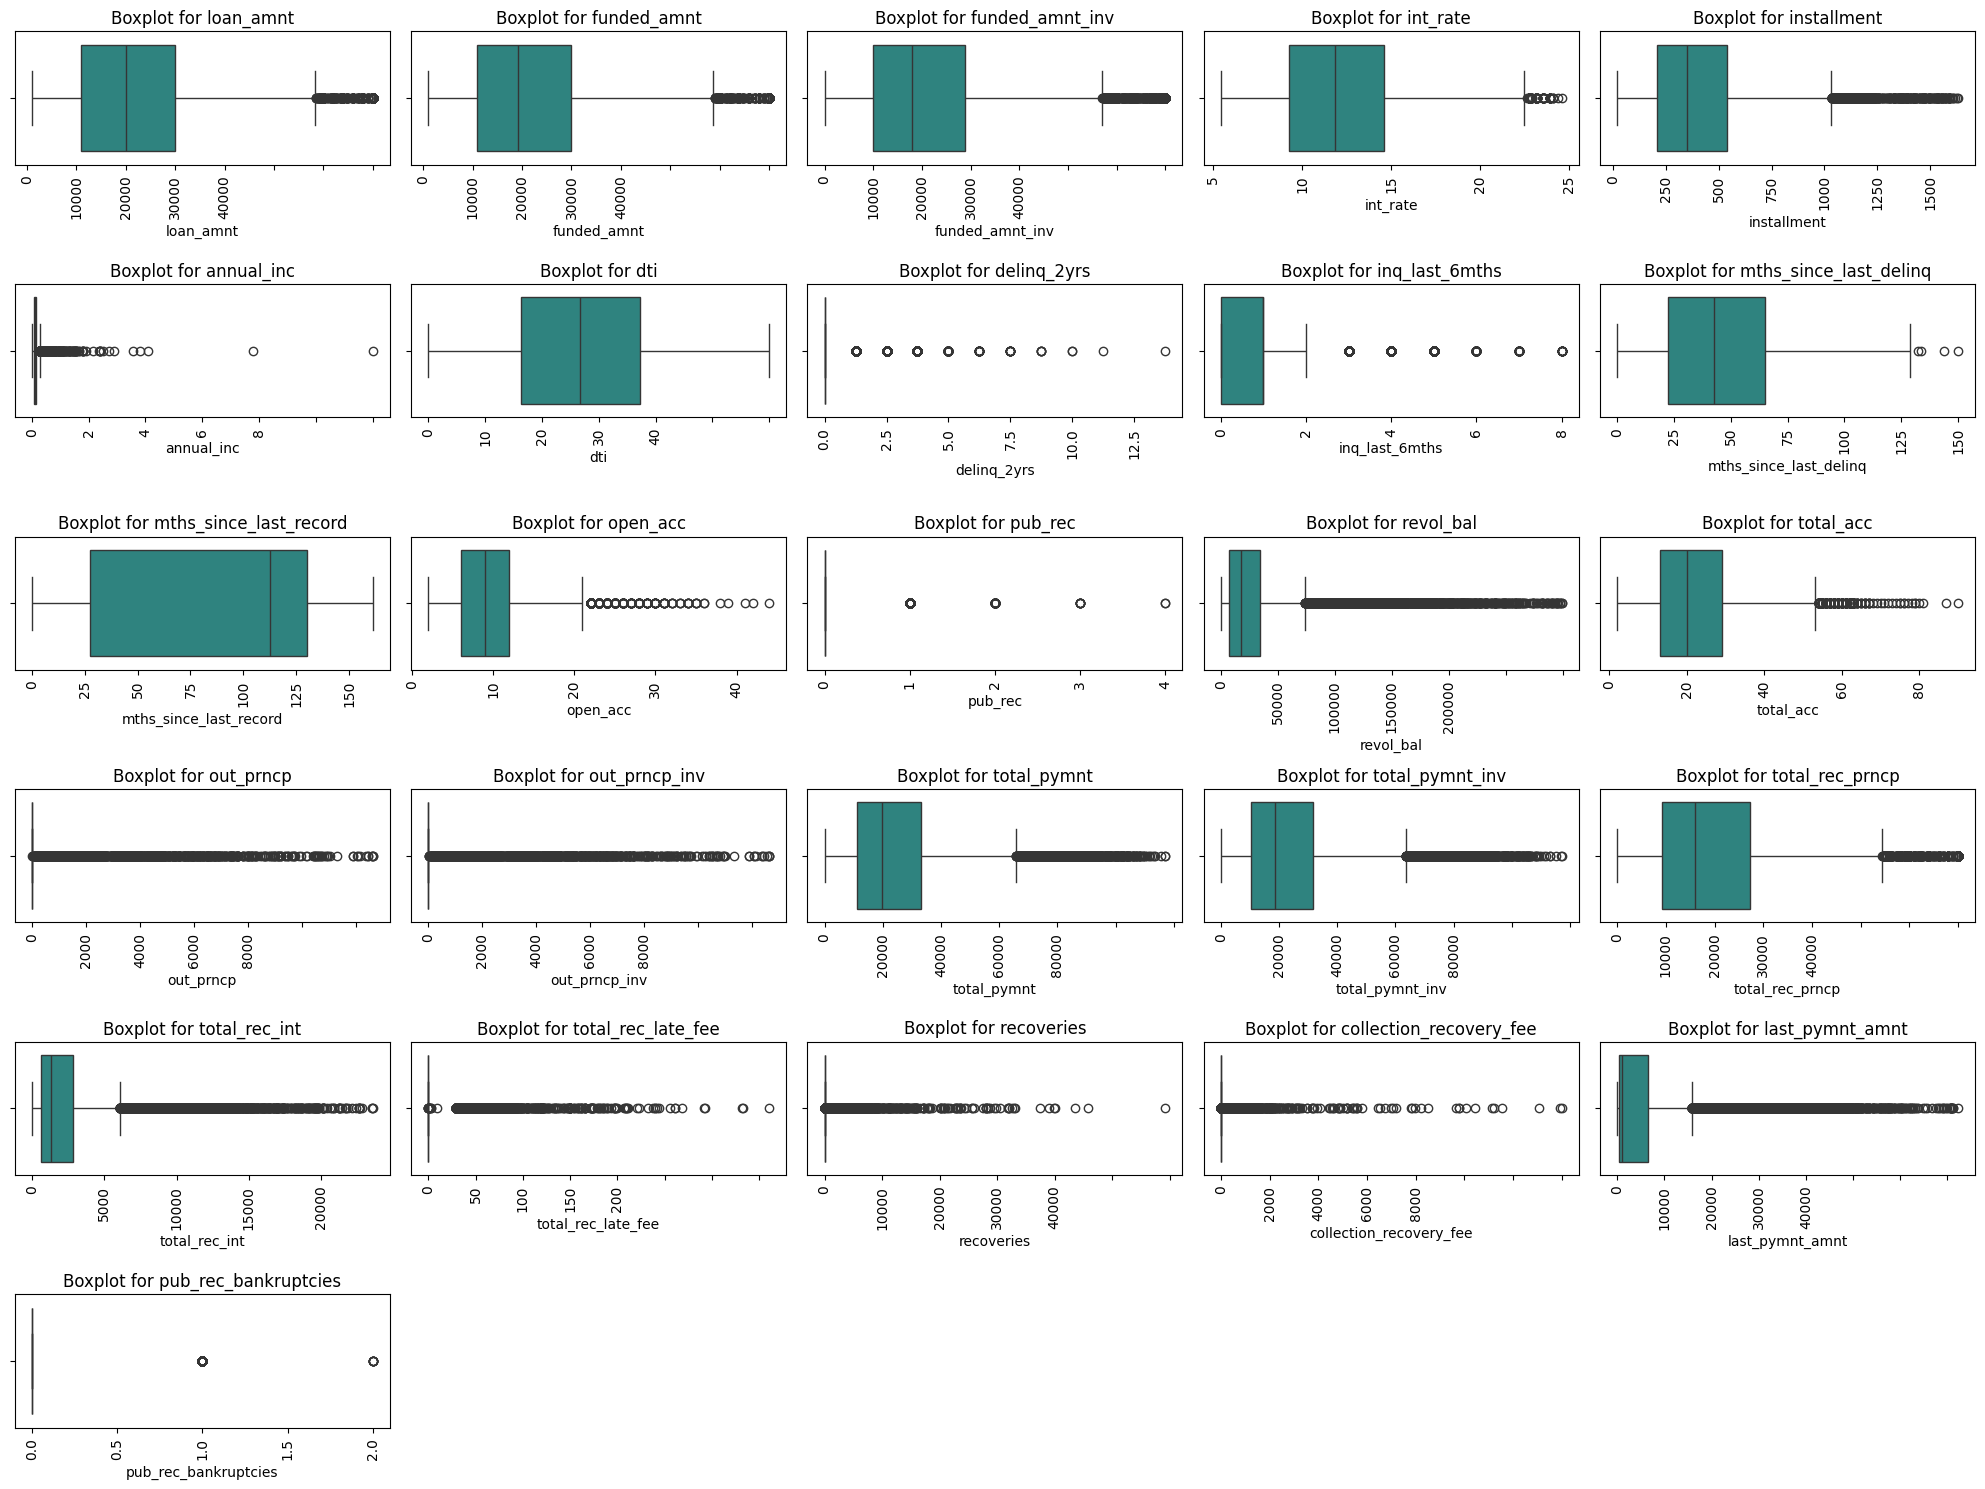

In [252]:
# Calculate the optimal number of rows and columns for the subplots
n_rows = int(np.ceil(np.sqrt(len(continuous_features))))
n_cols = int(np.ceil(len(continuous_features) / n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    sns.boxplot(data=df, x=feature, palette="viridis", ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel(feature)
    axes[i].set_title(f"Boxplot for {feature}")  # Optional: Add subplot titles

# Remove any empty subplots
for i in range(len(continuous_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Improve layout for better readability

plt.savefig('Boxplot.png', dpi=300)

plt.show()

As analysed before using hist, it is now evident that outliers are present in pub_rec_bankruptcies, collection_recovery_fee, recoveries, total_rec_late_fee, out_prncp_inv, out_prncp, pub_rec, annual_inc. delinq_2yrs and they adding discrepencies to the distribution

In [278]:
df["annual_inc"].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

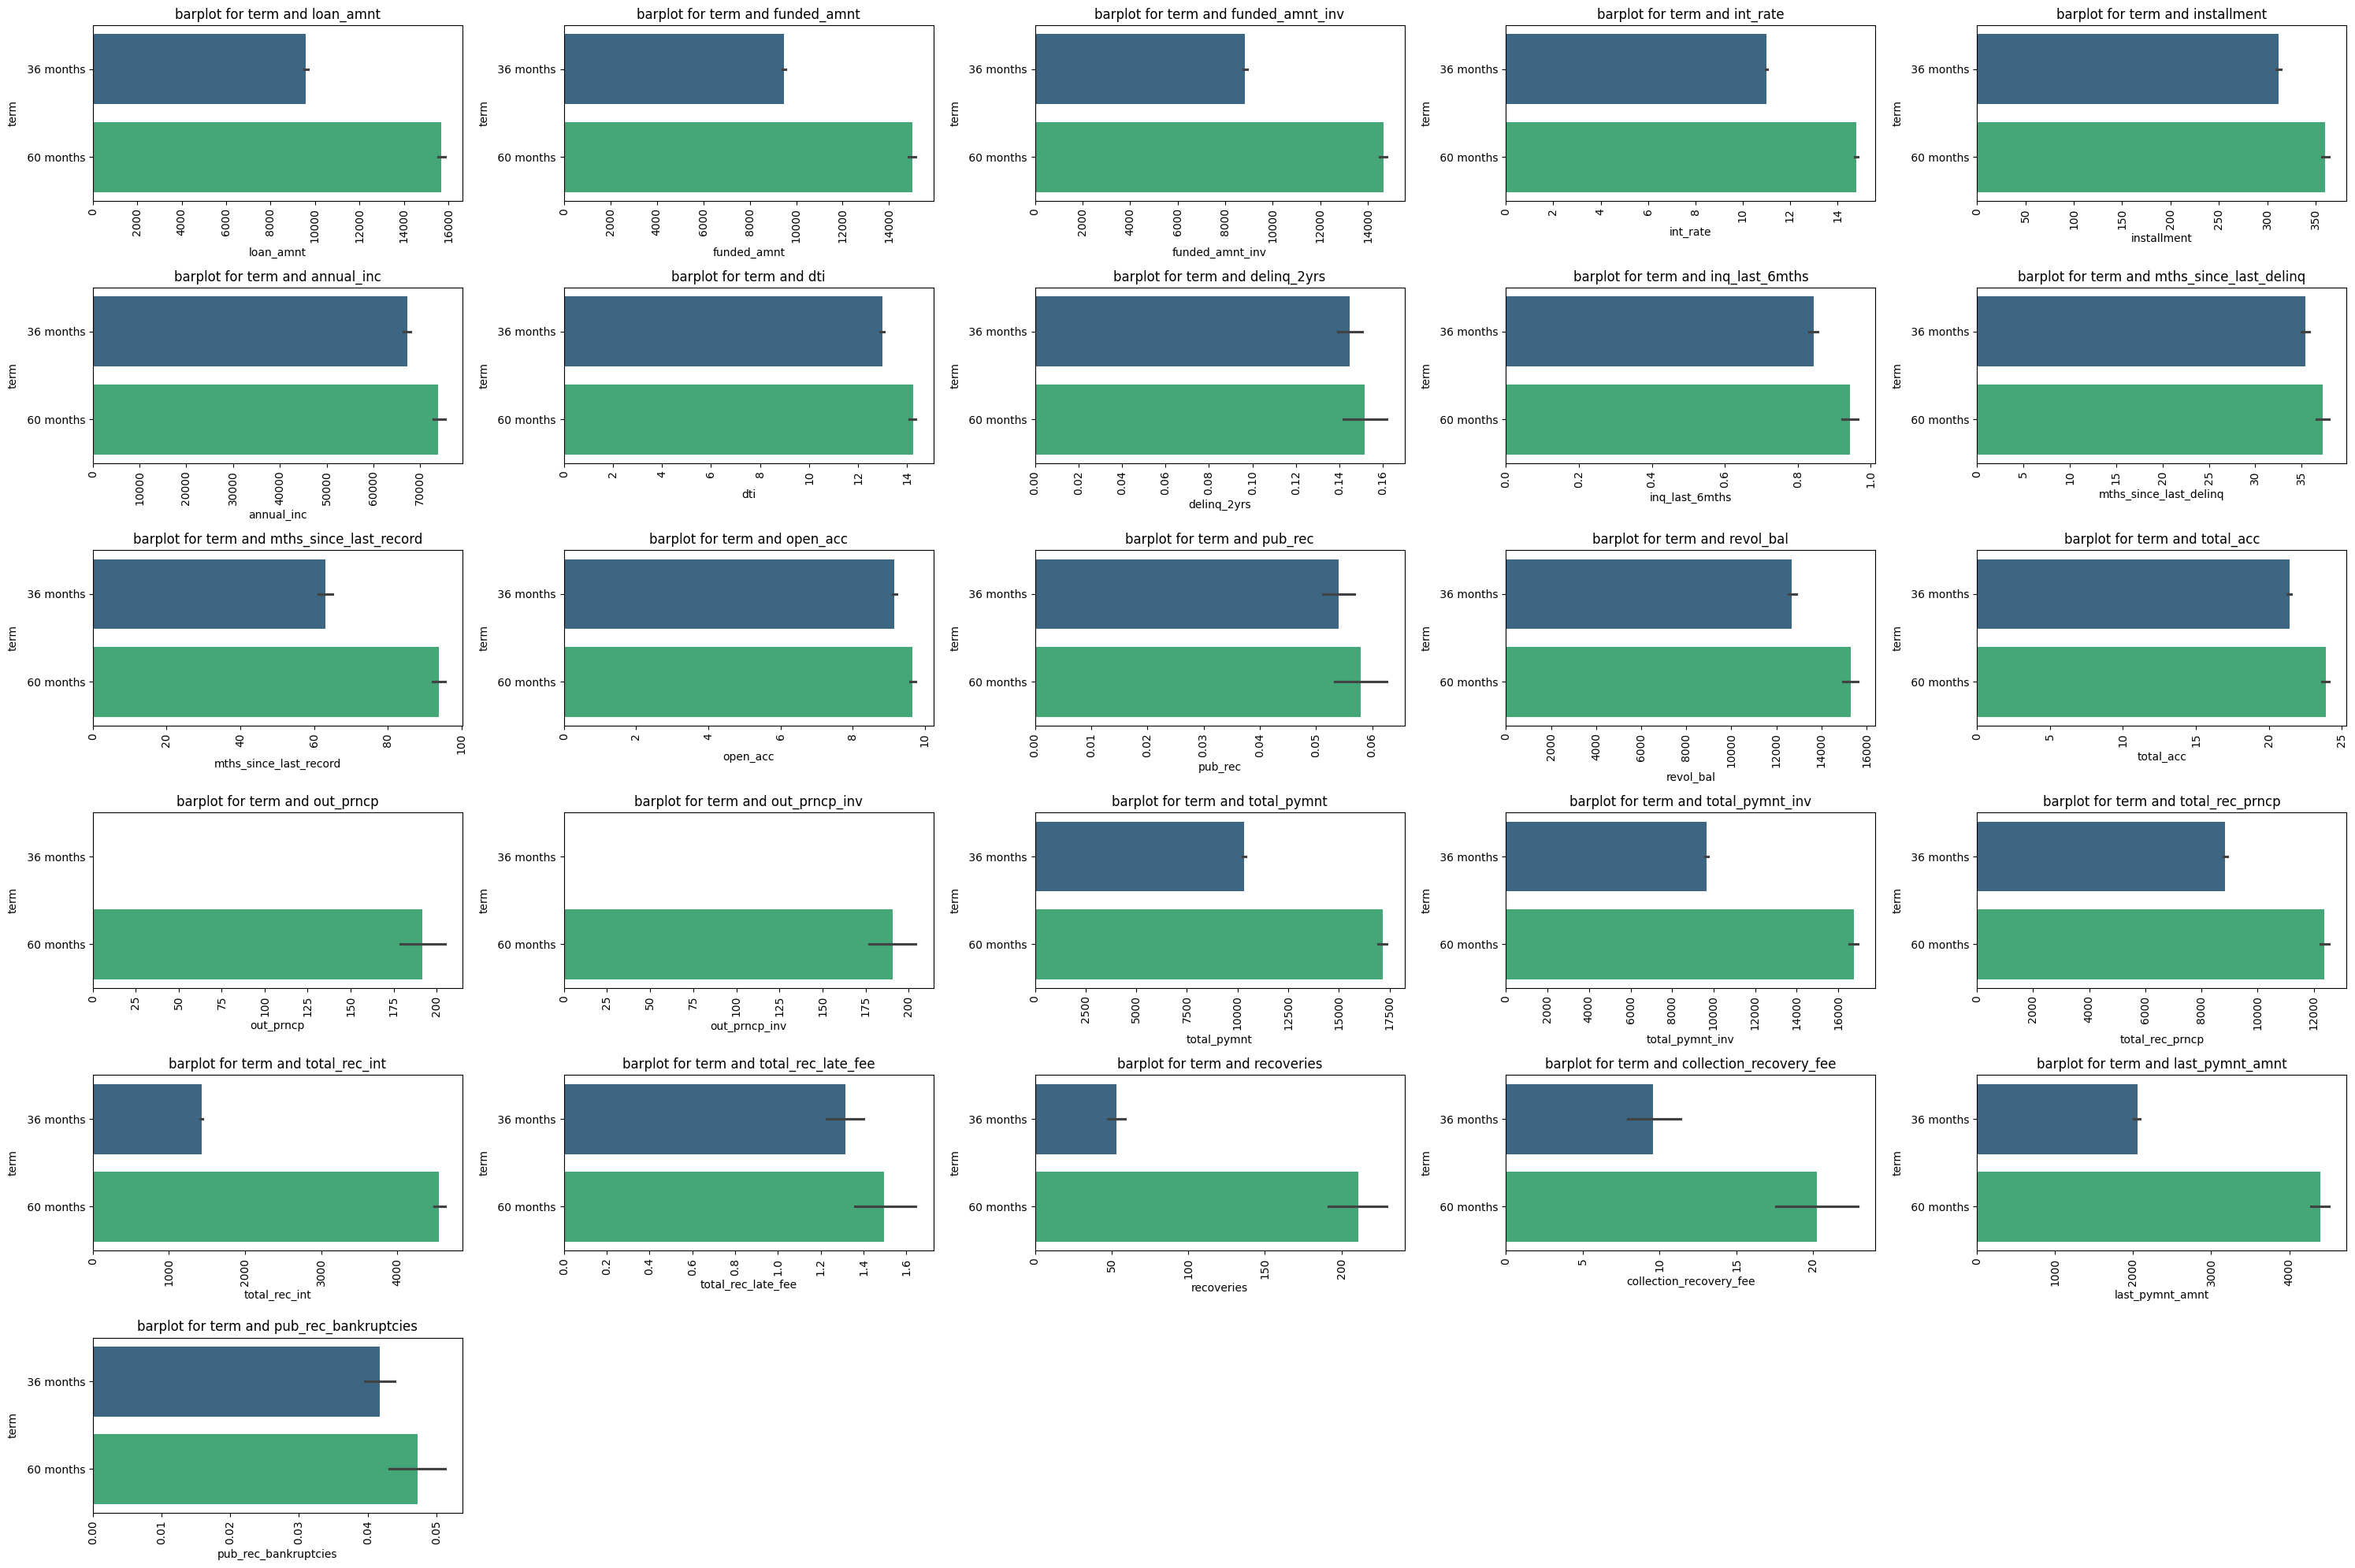

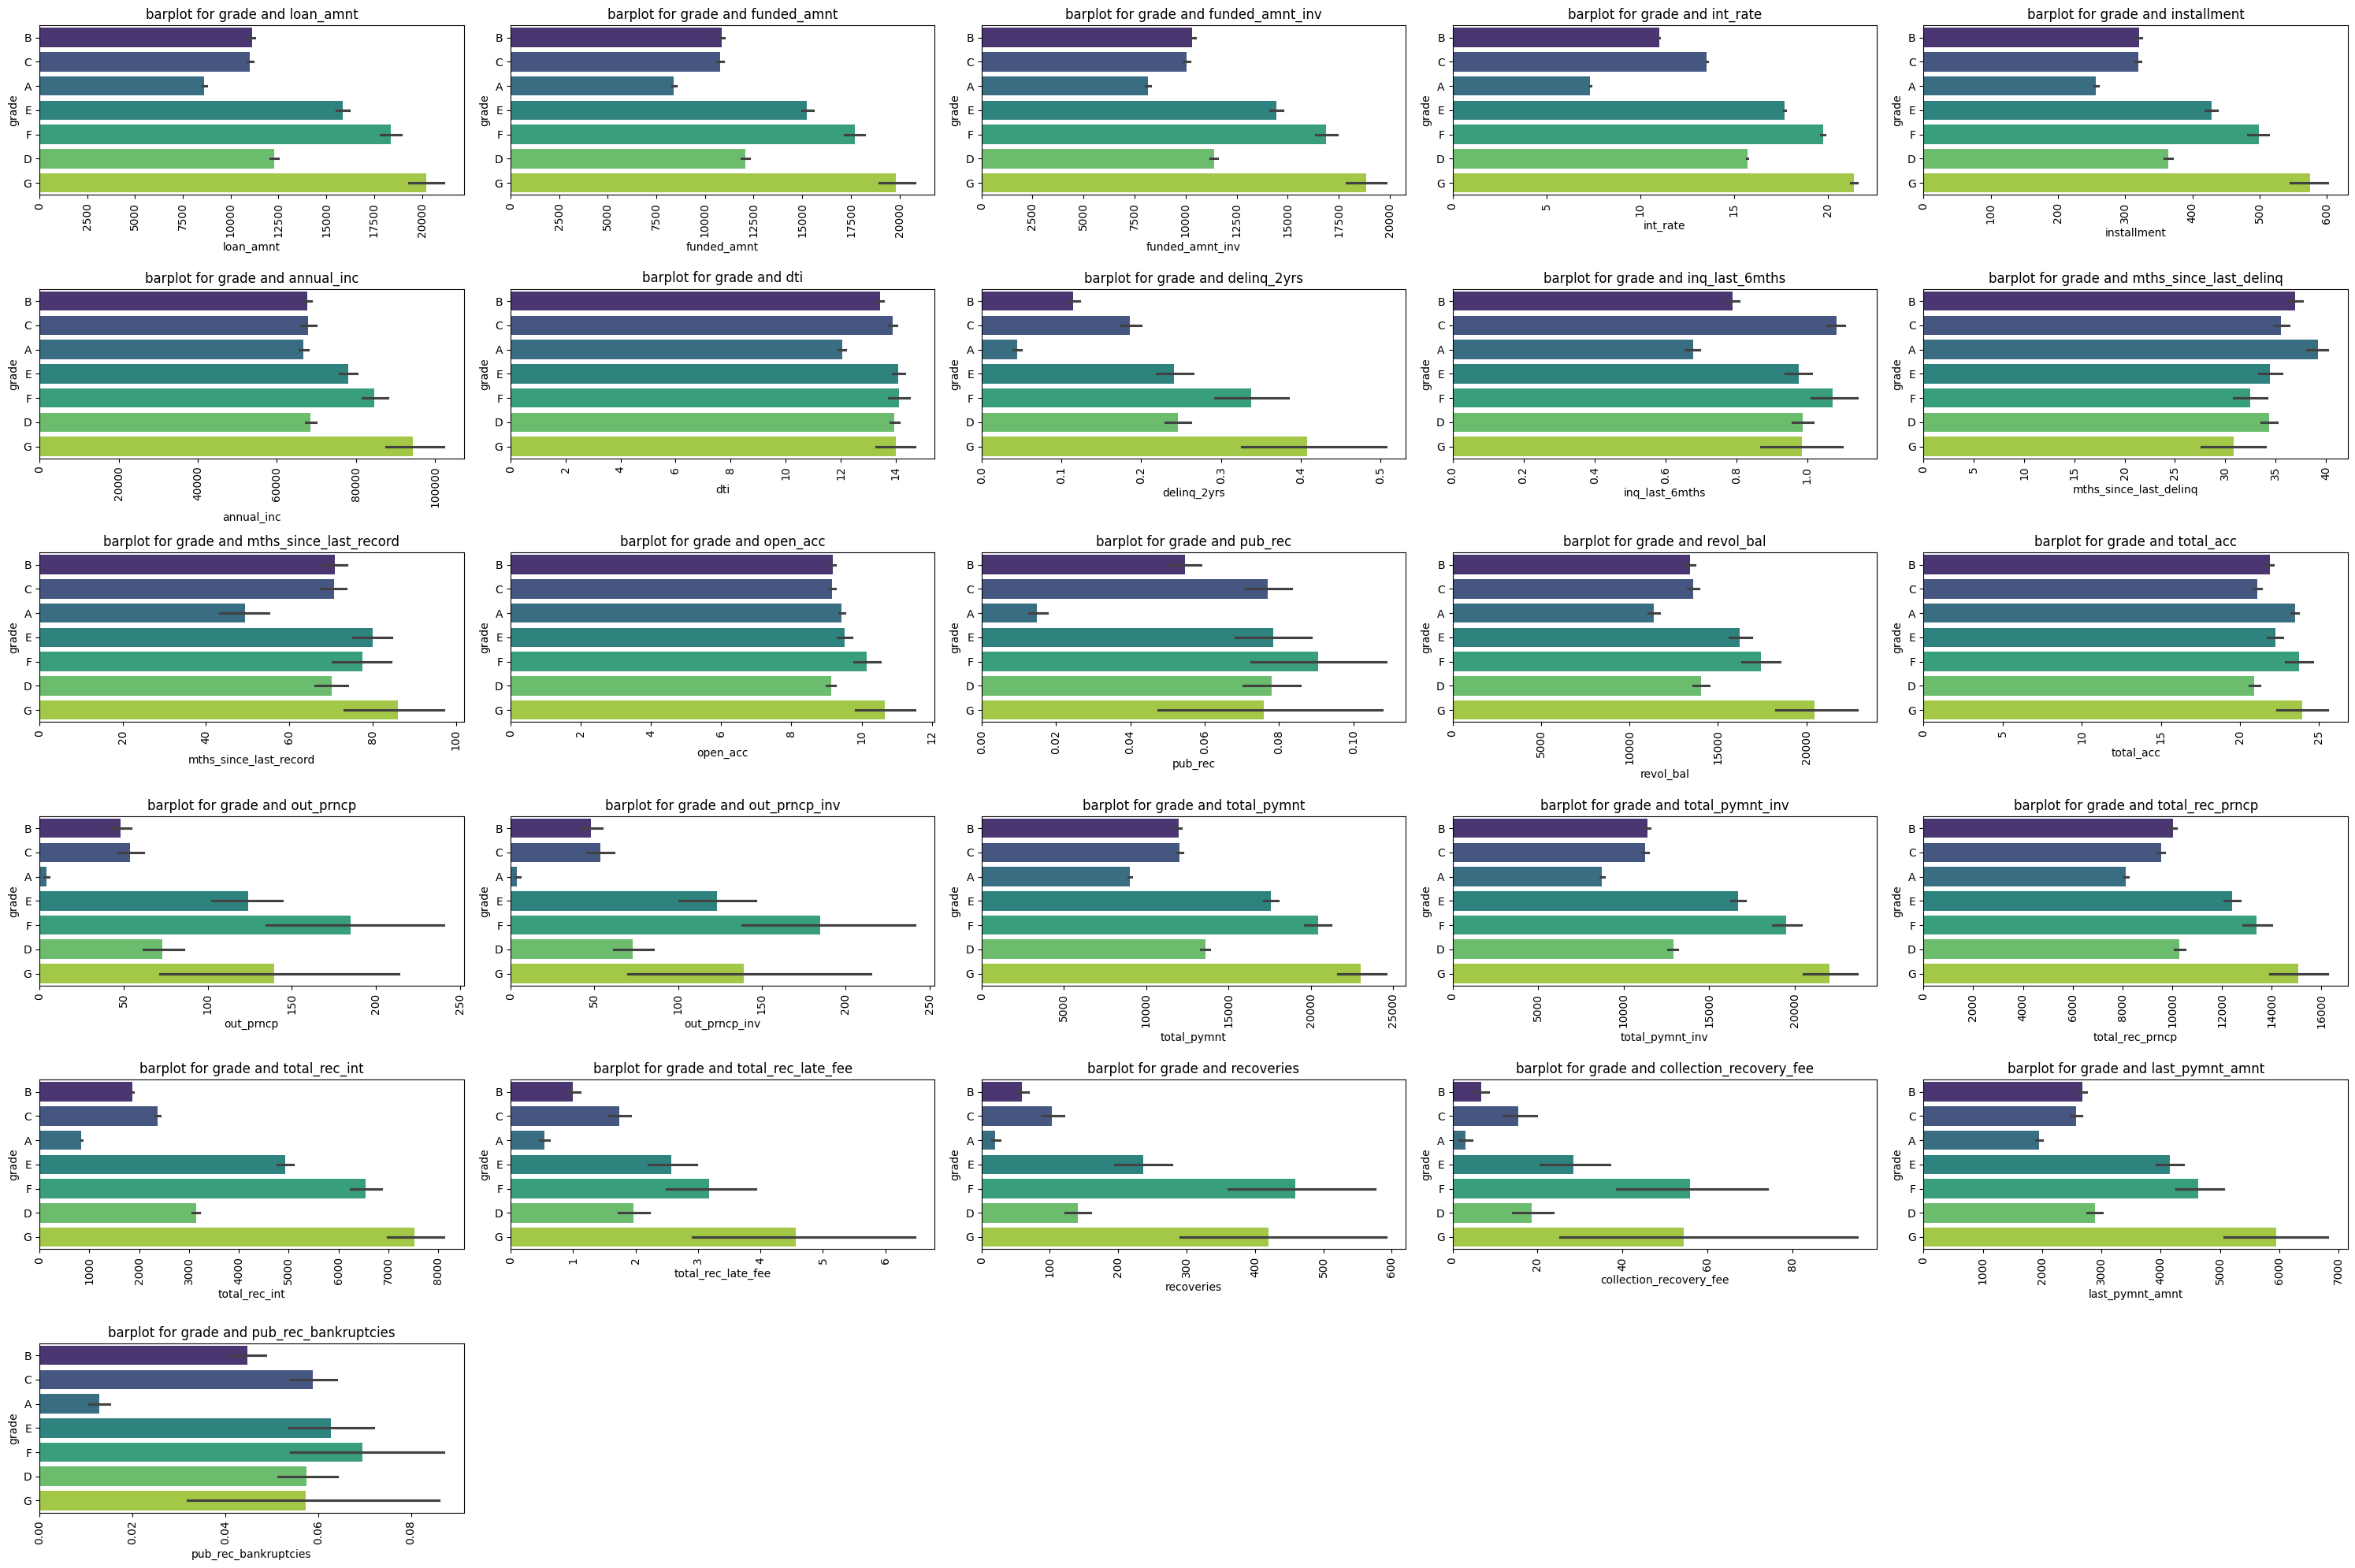

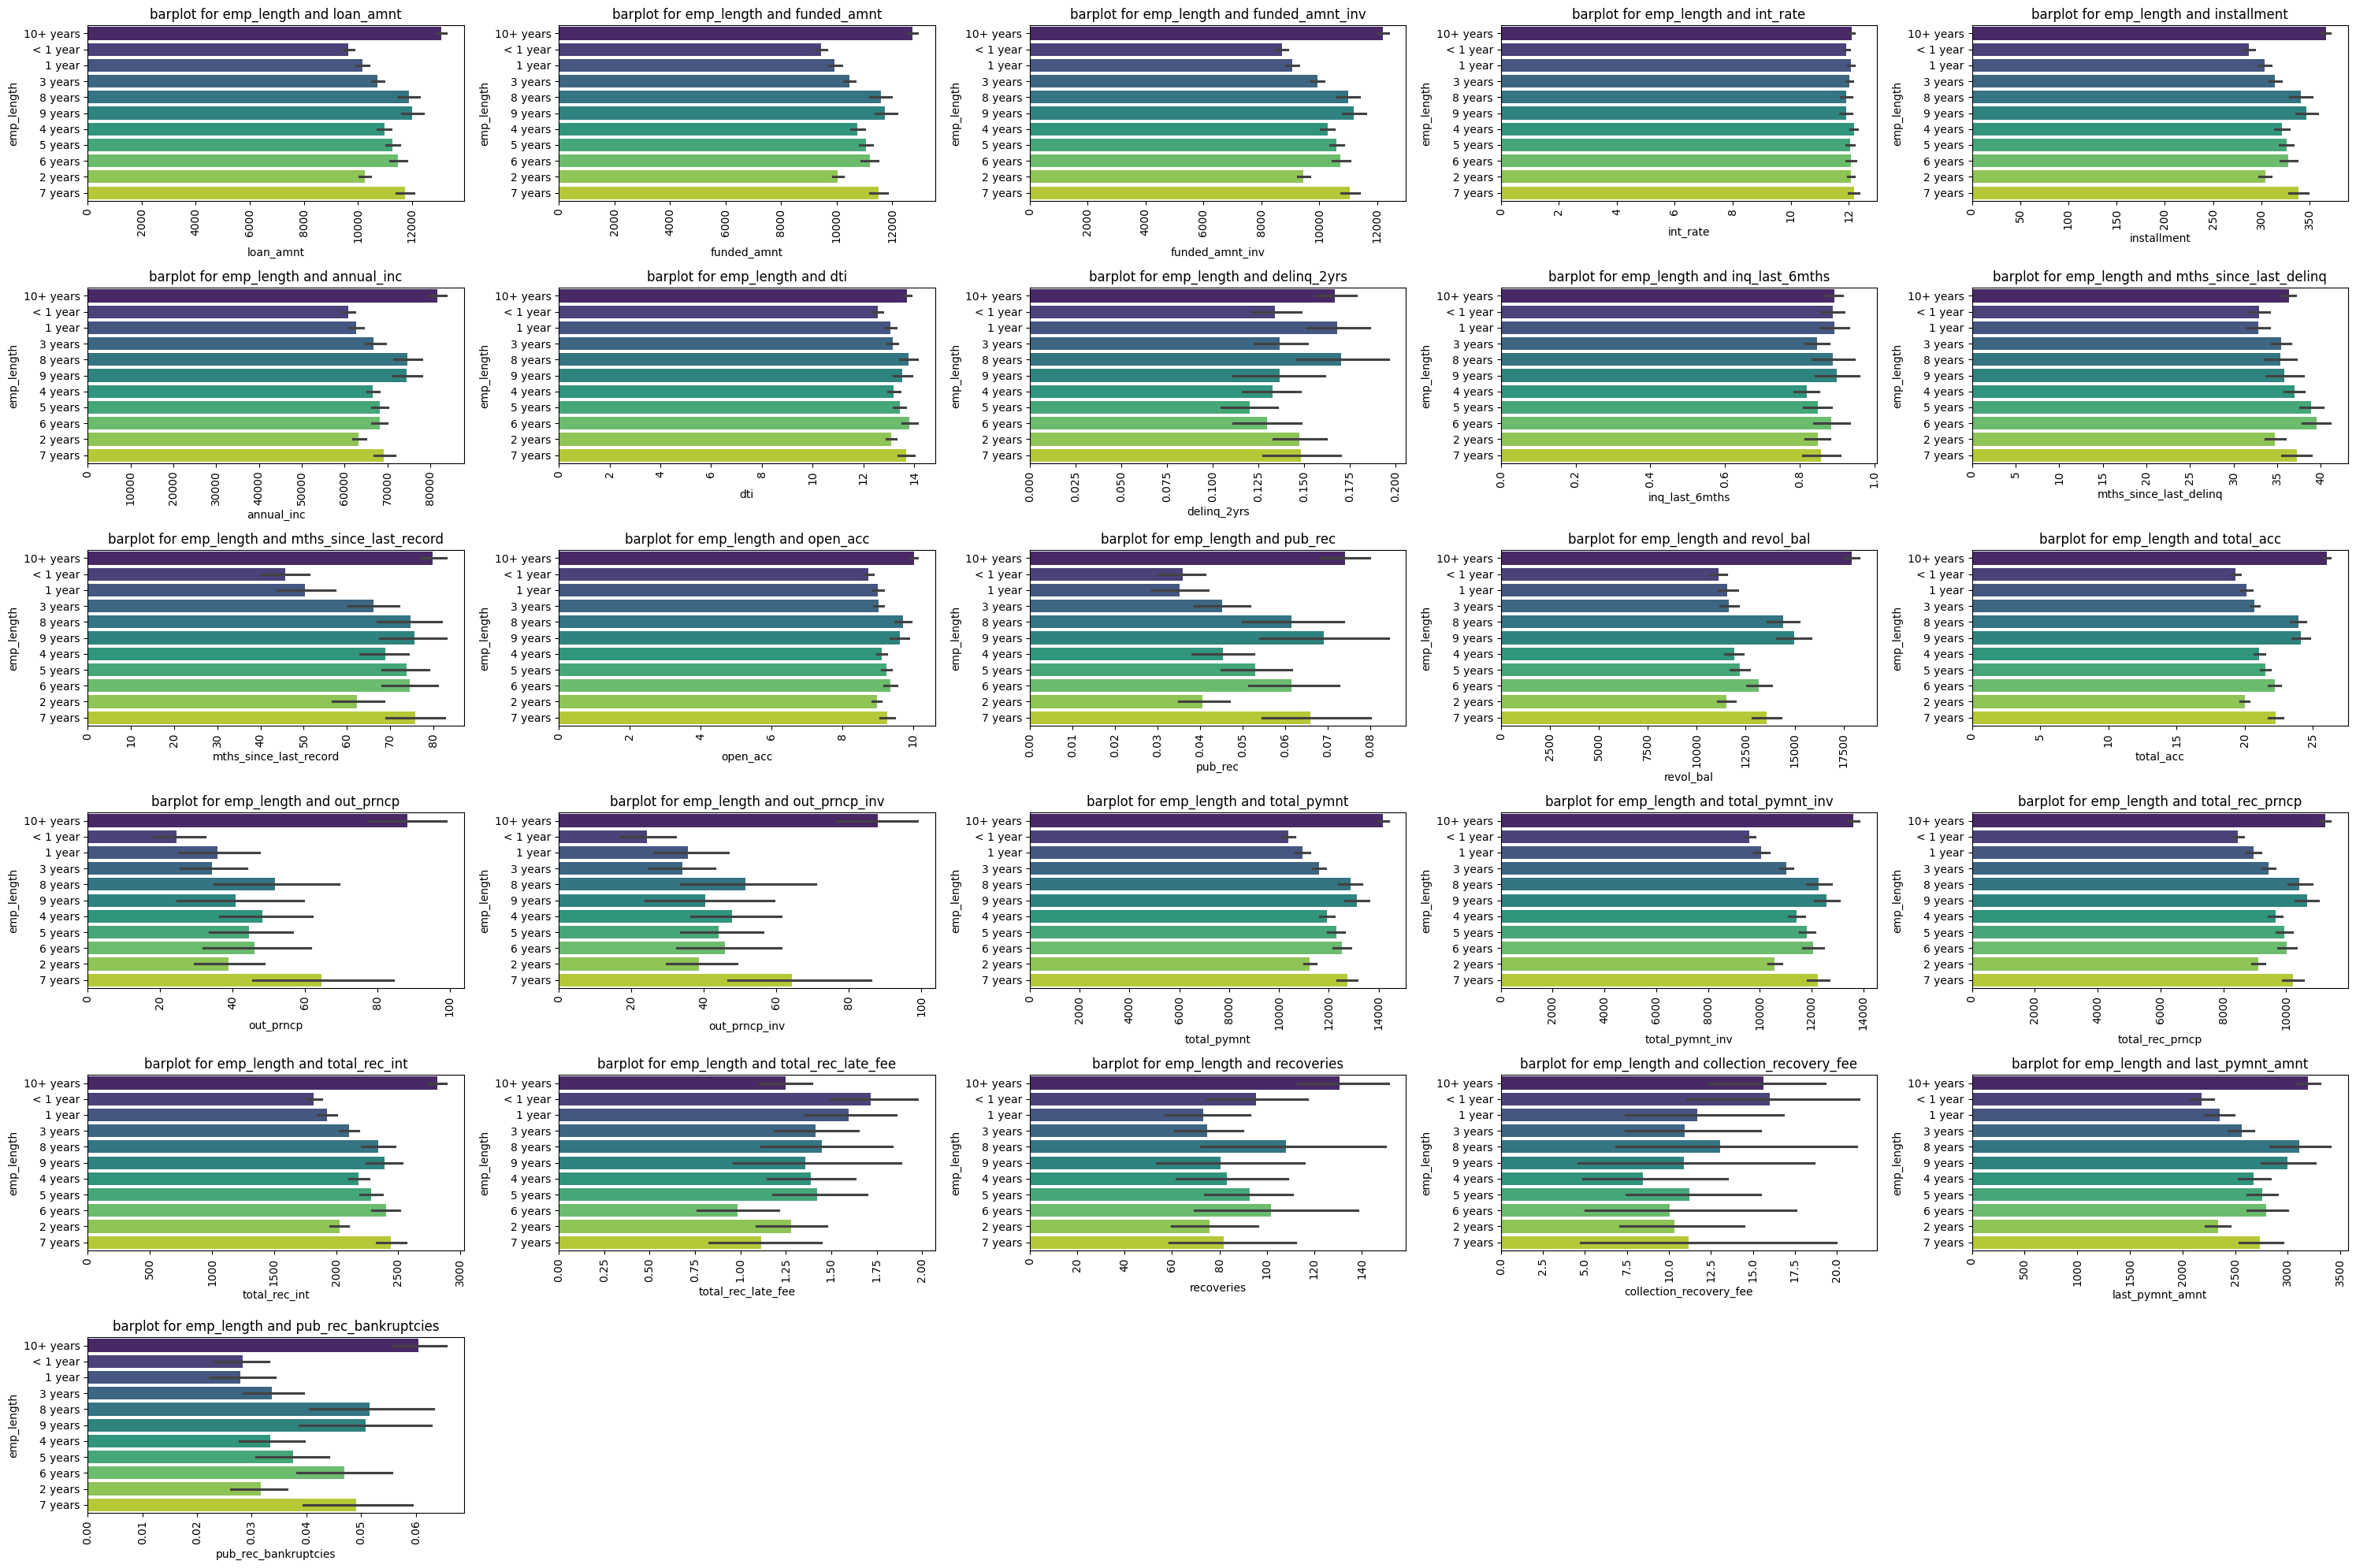

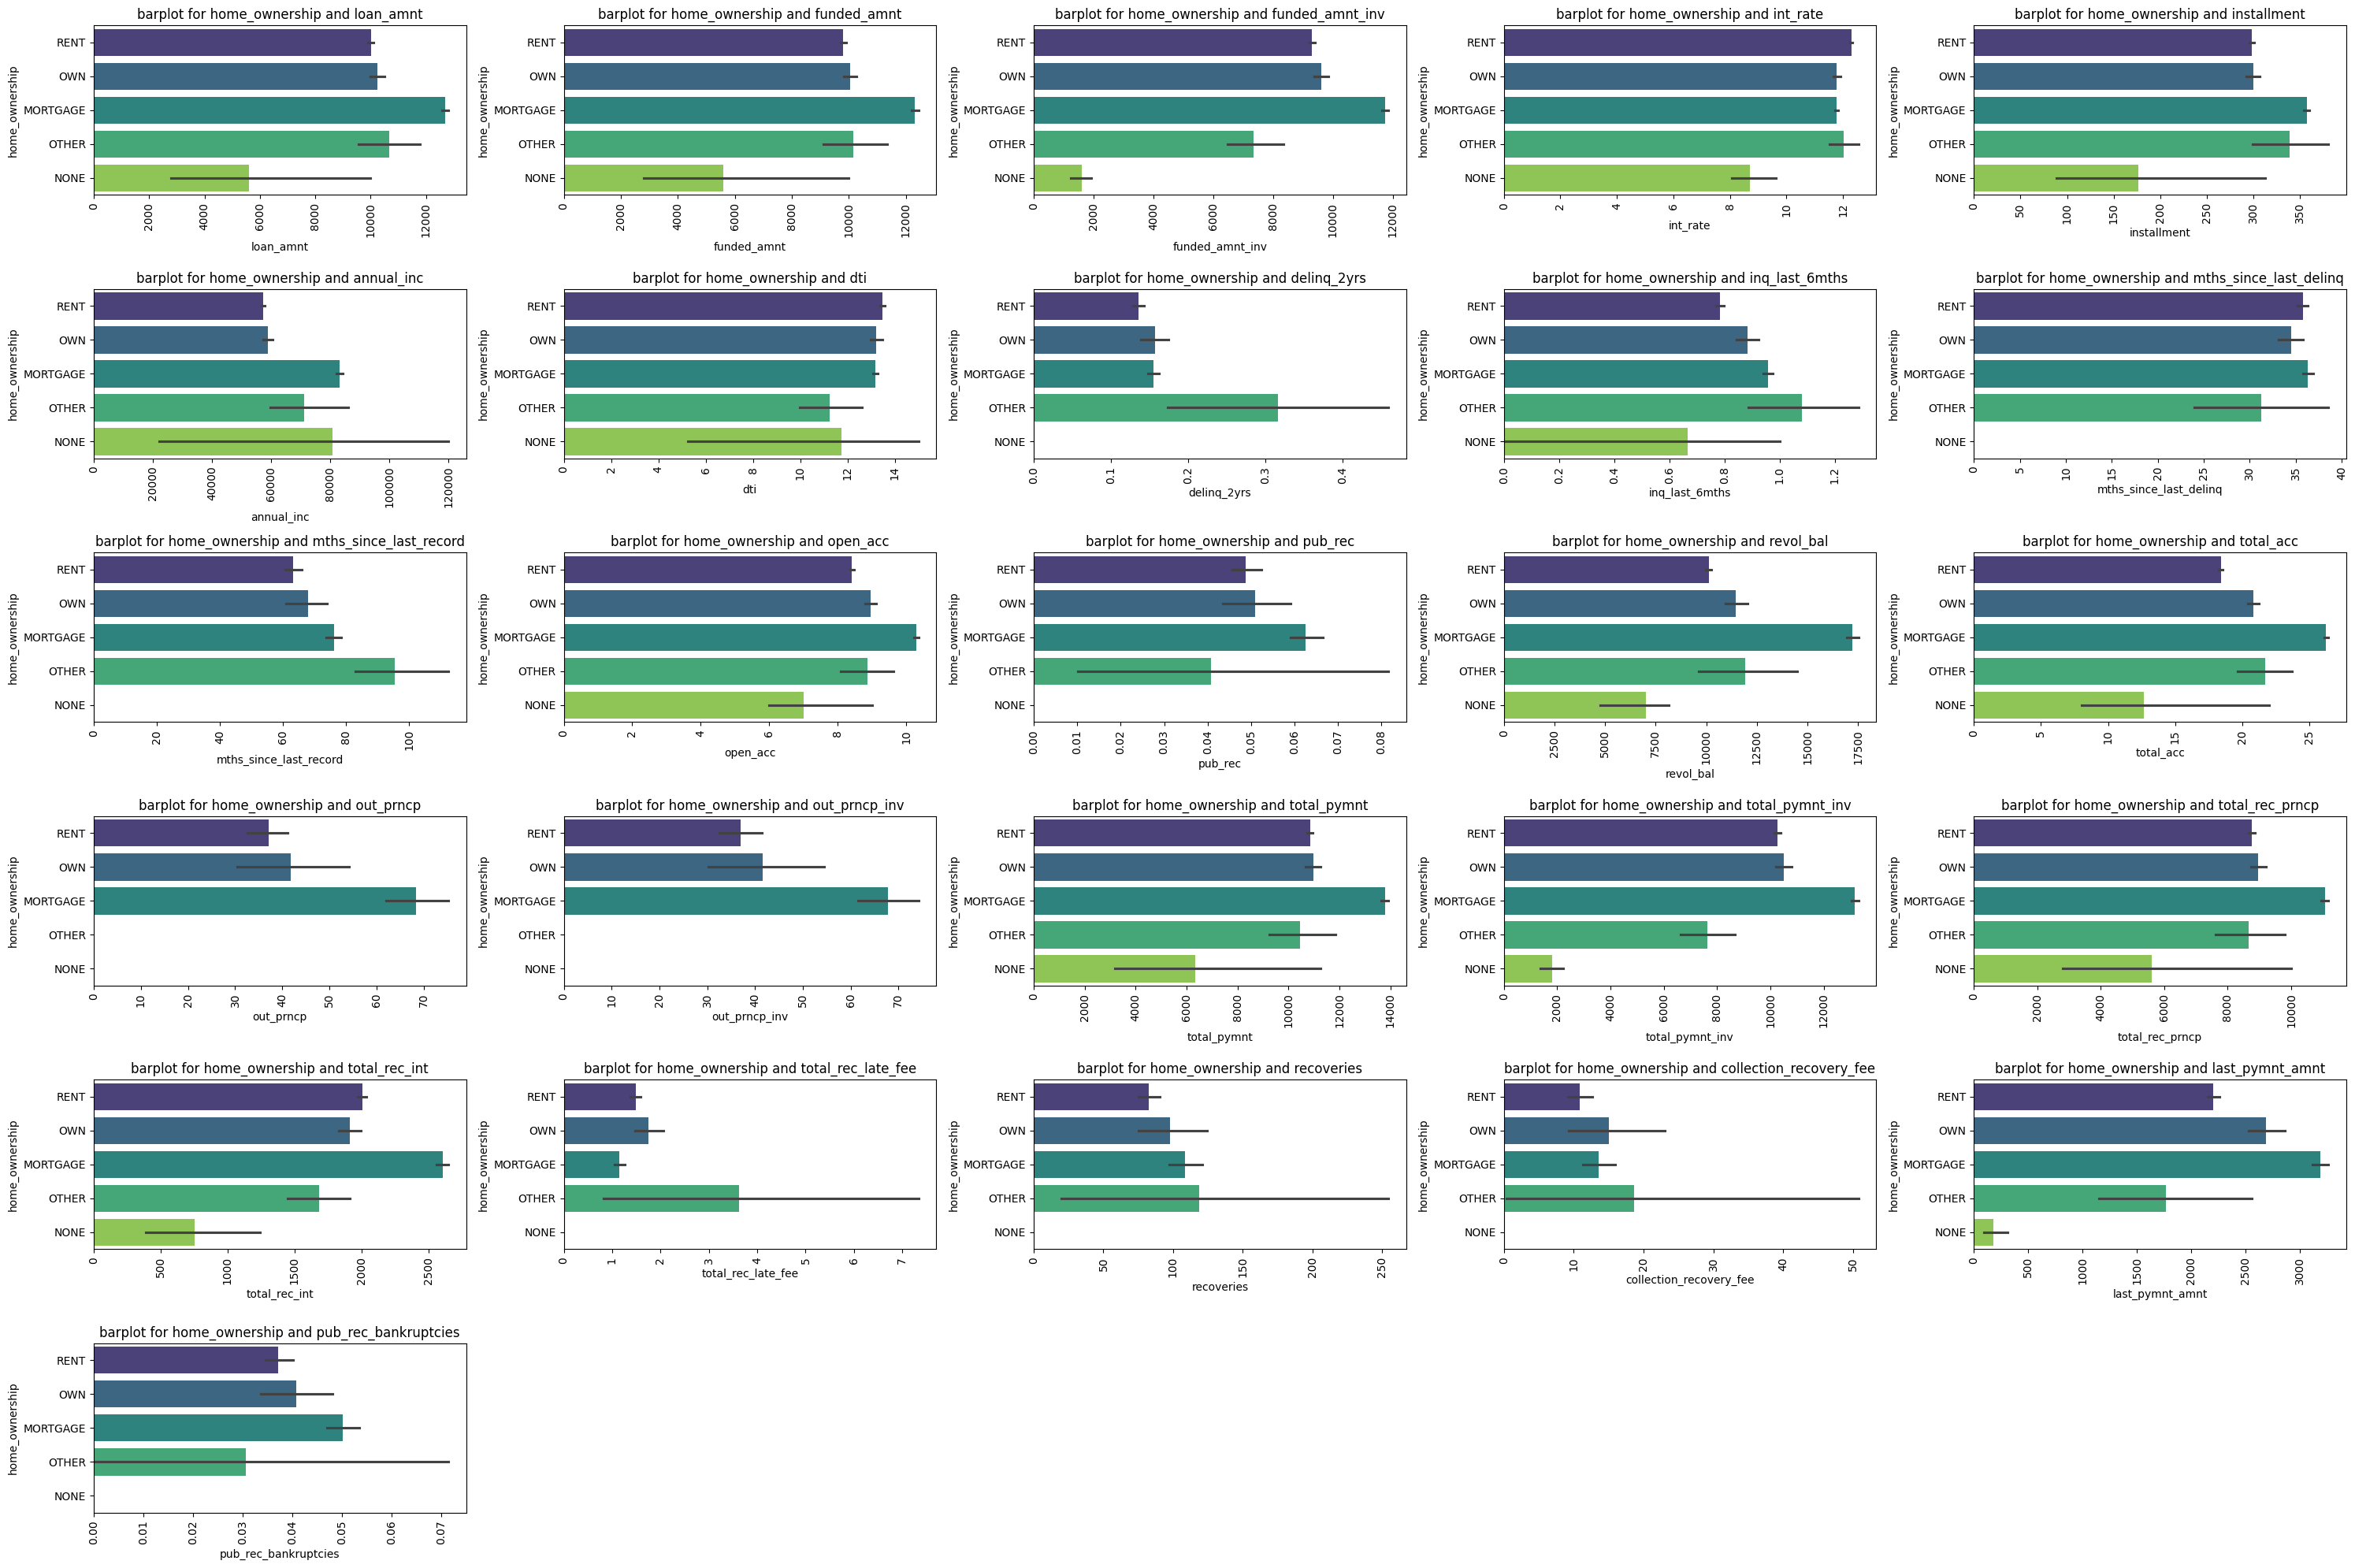

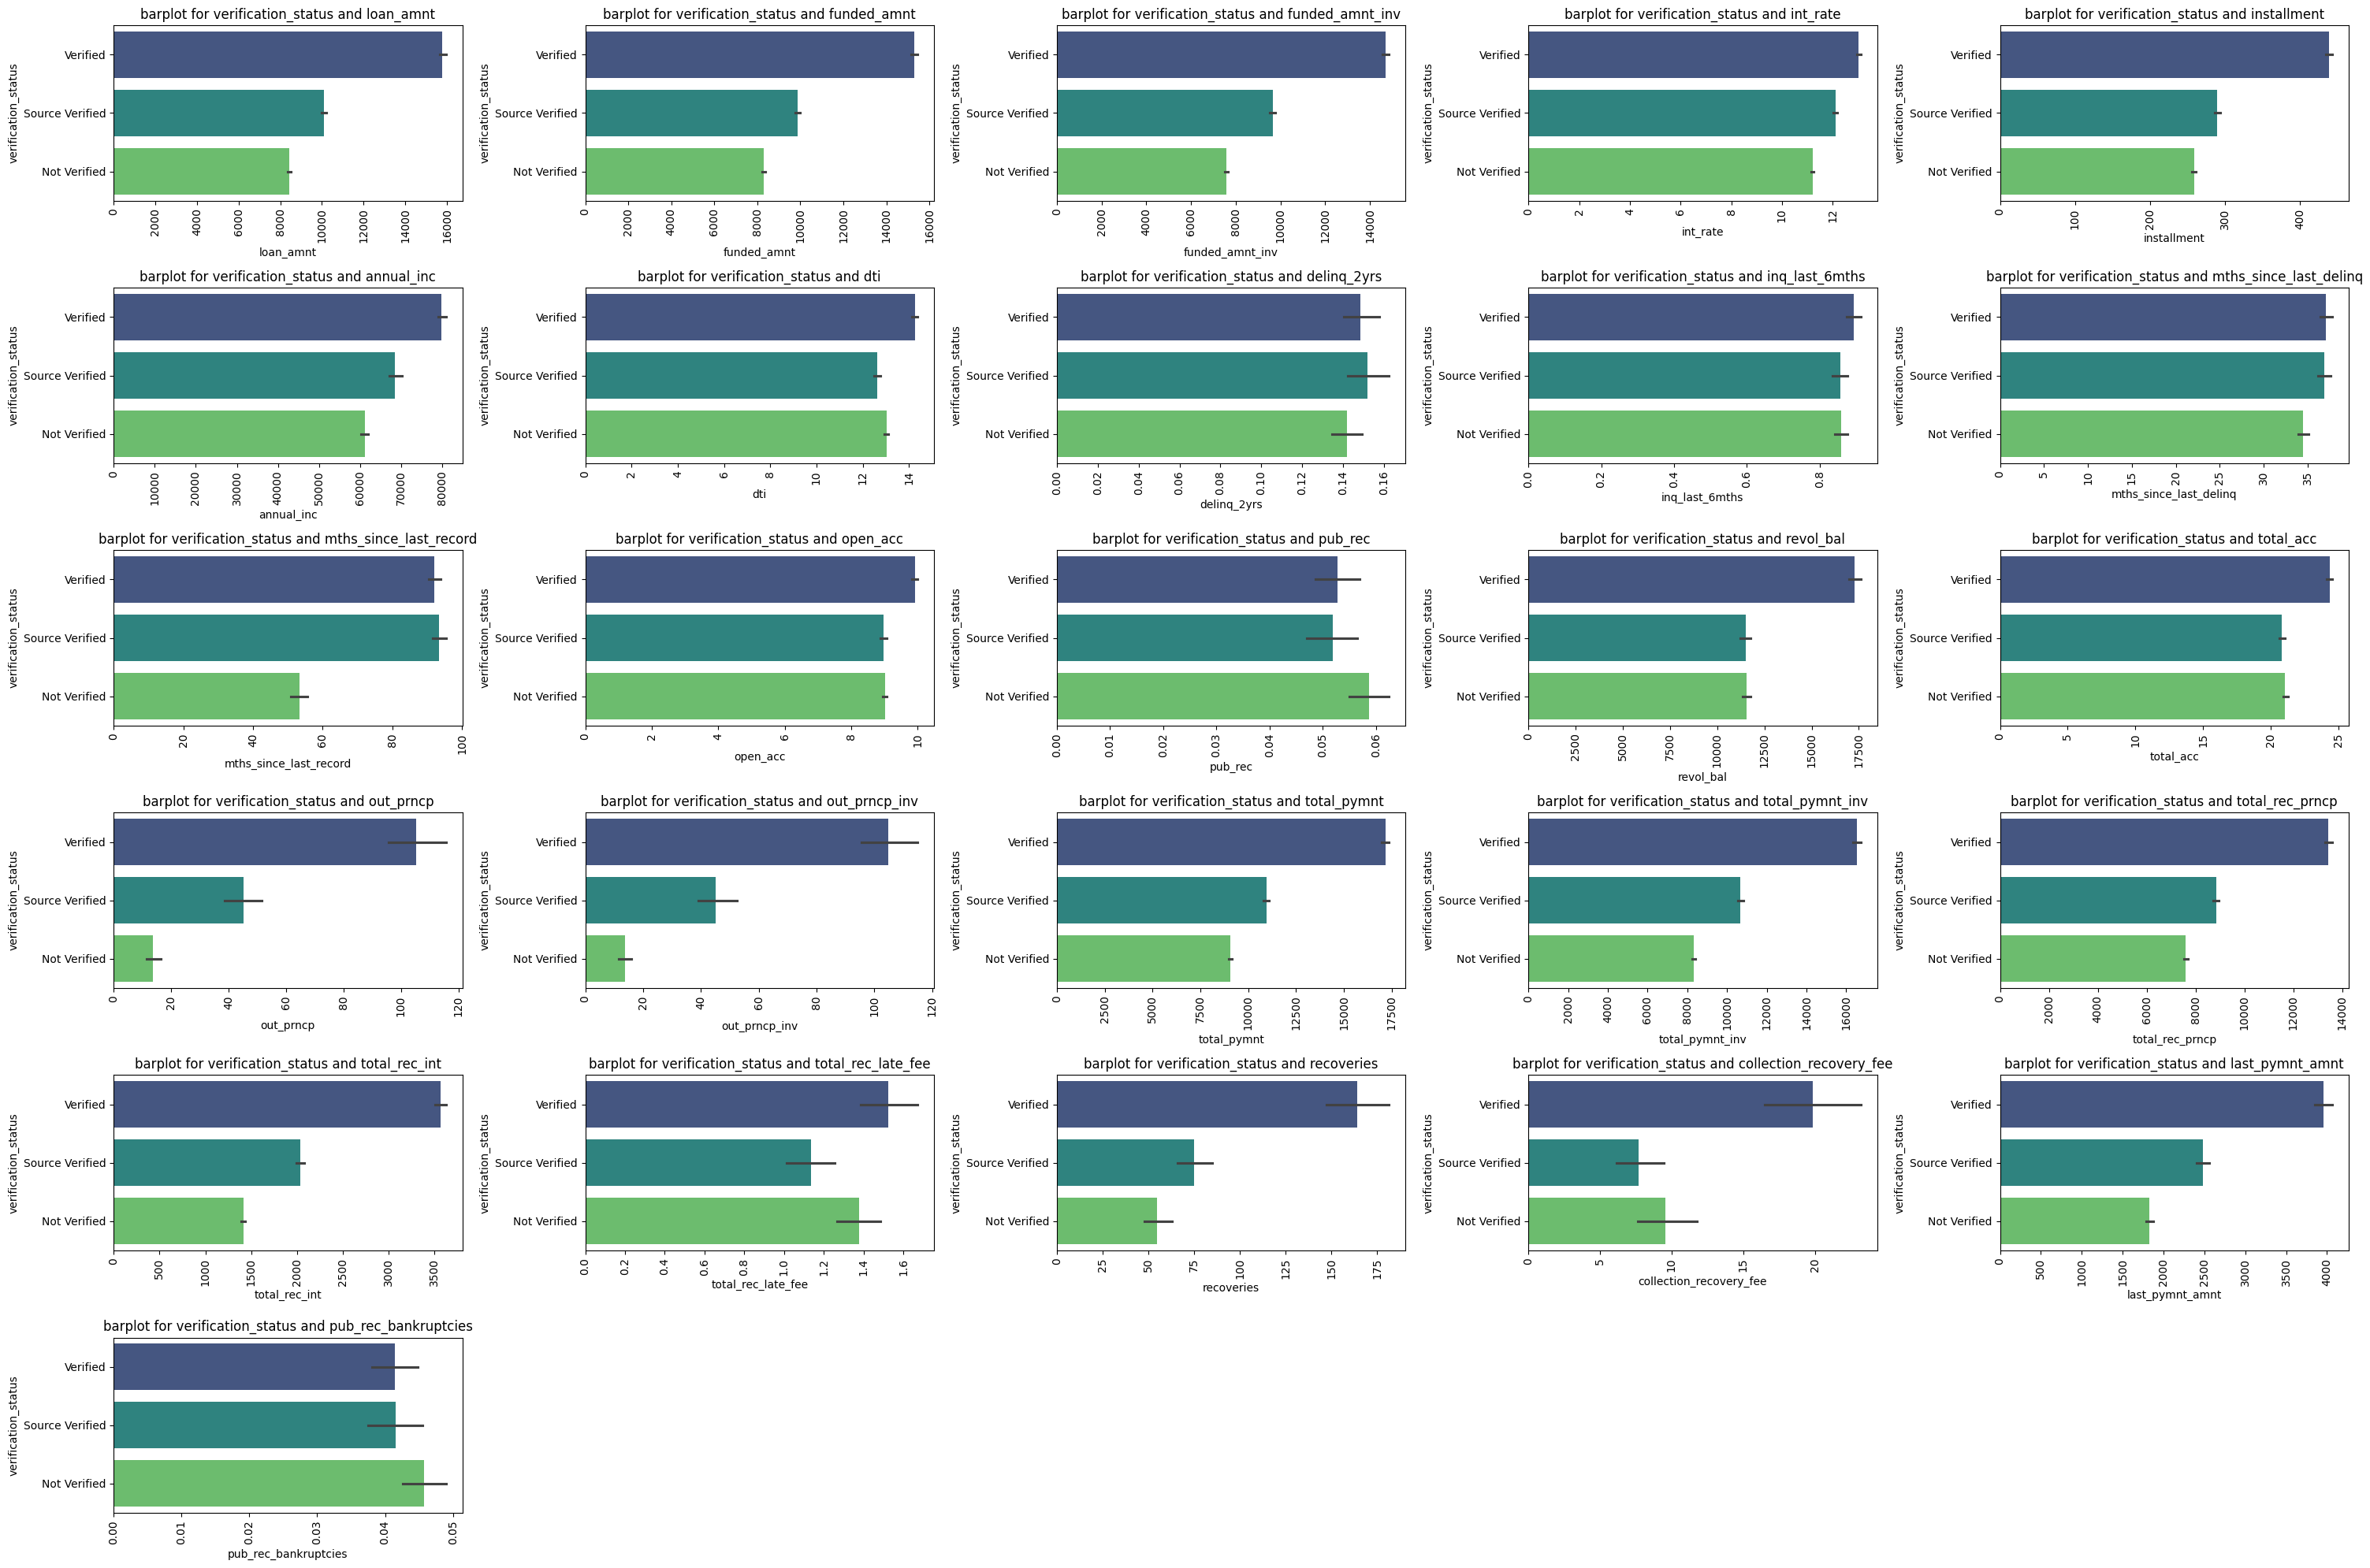

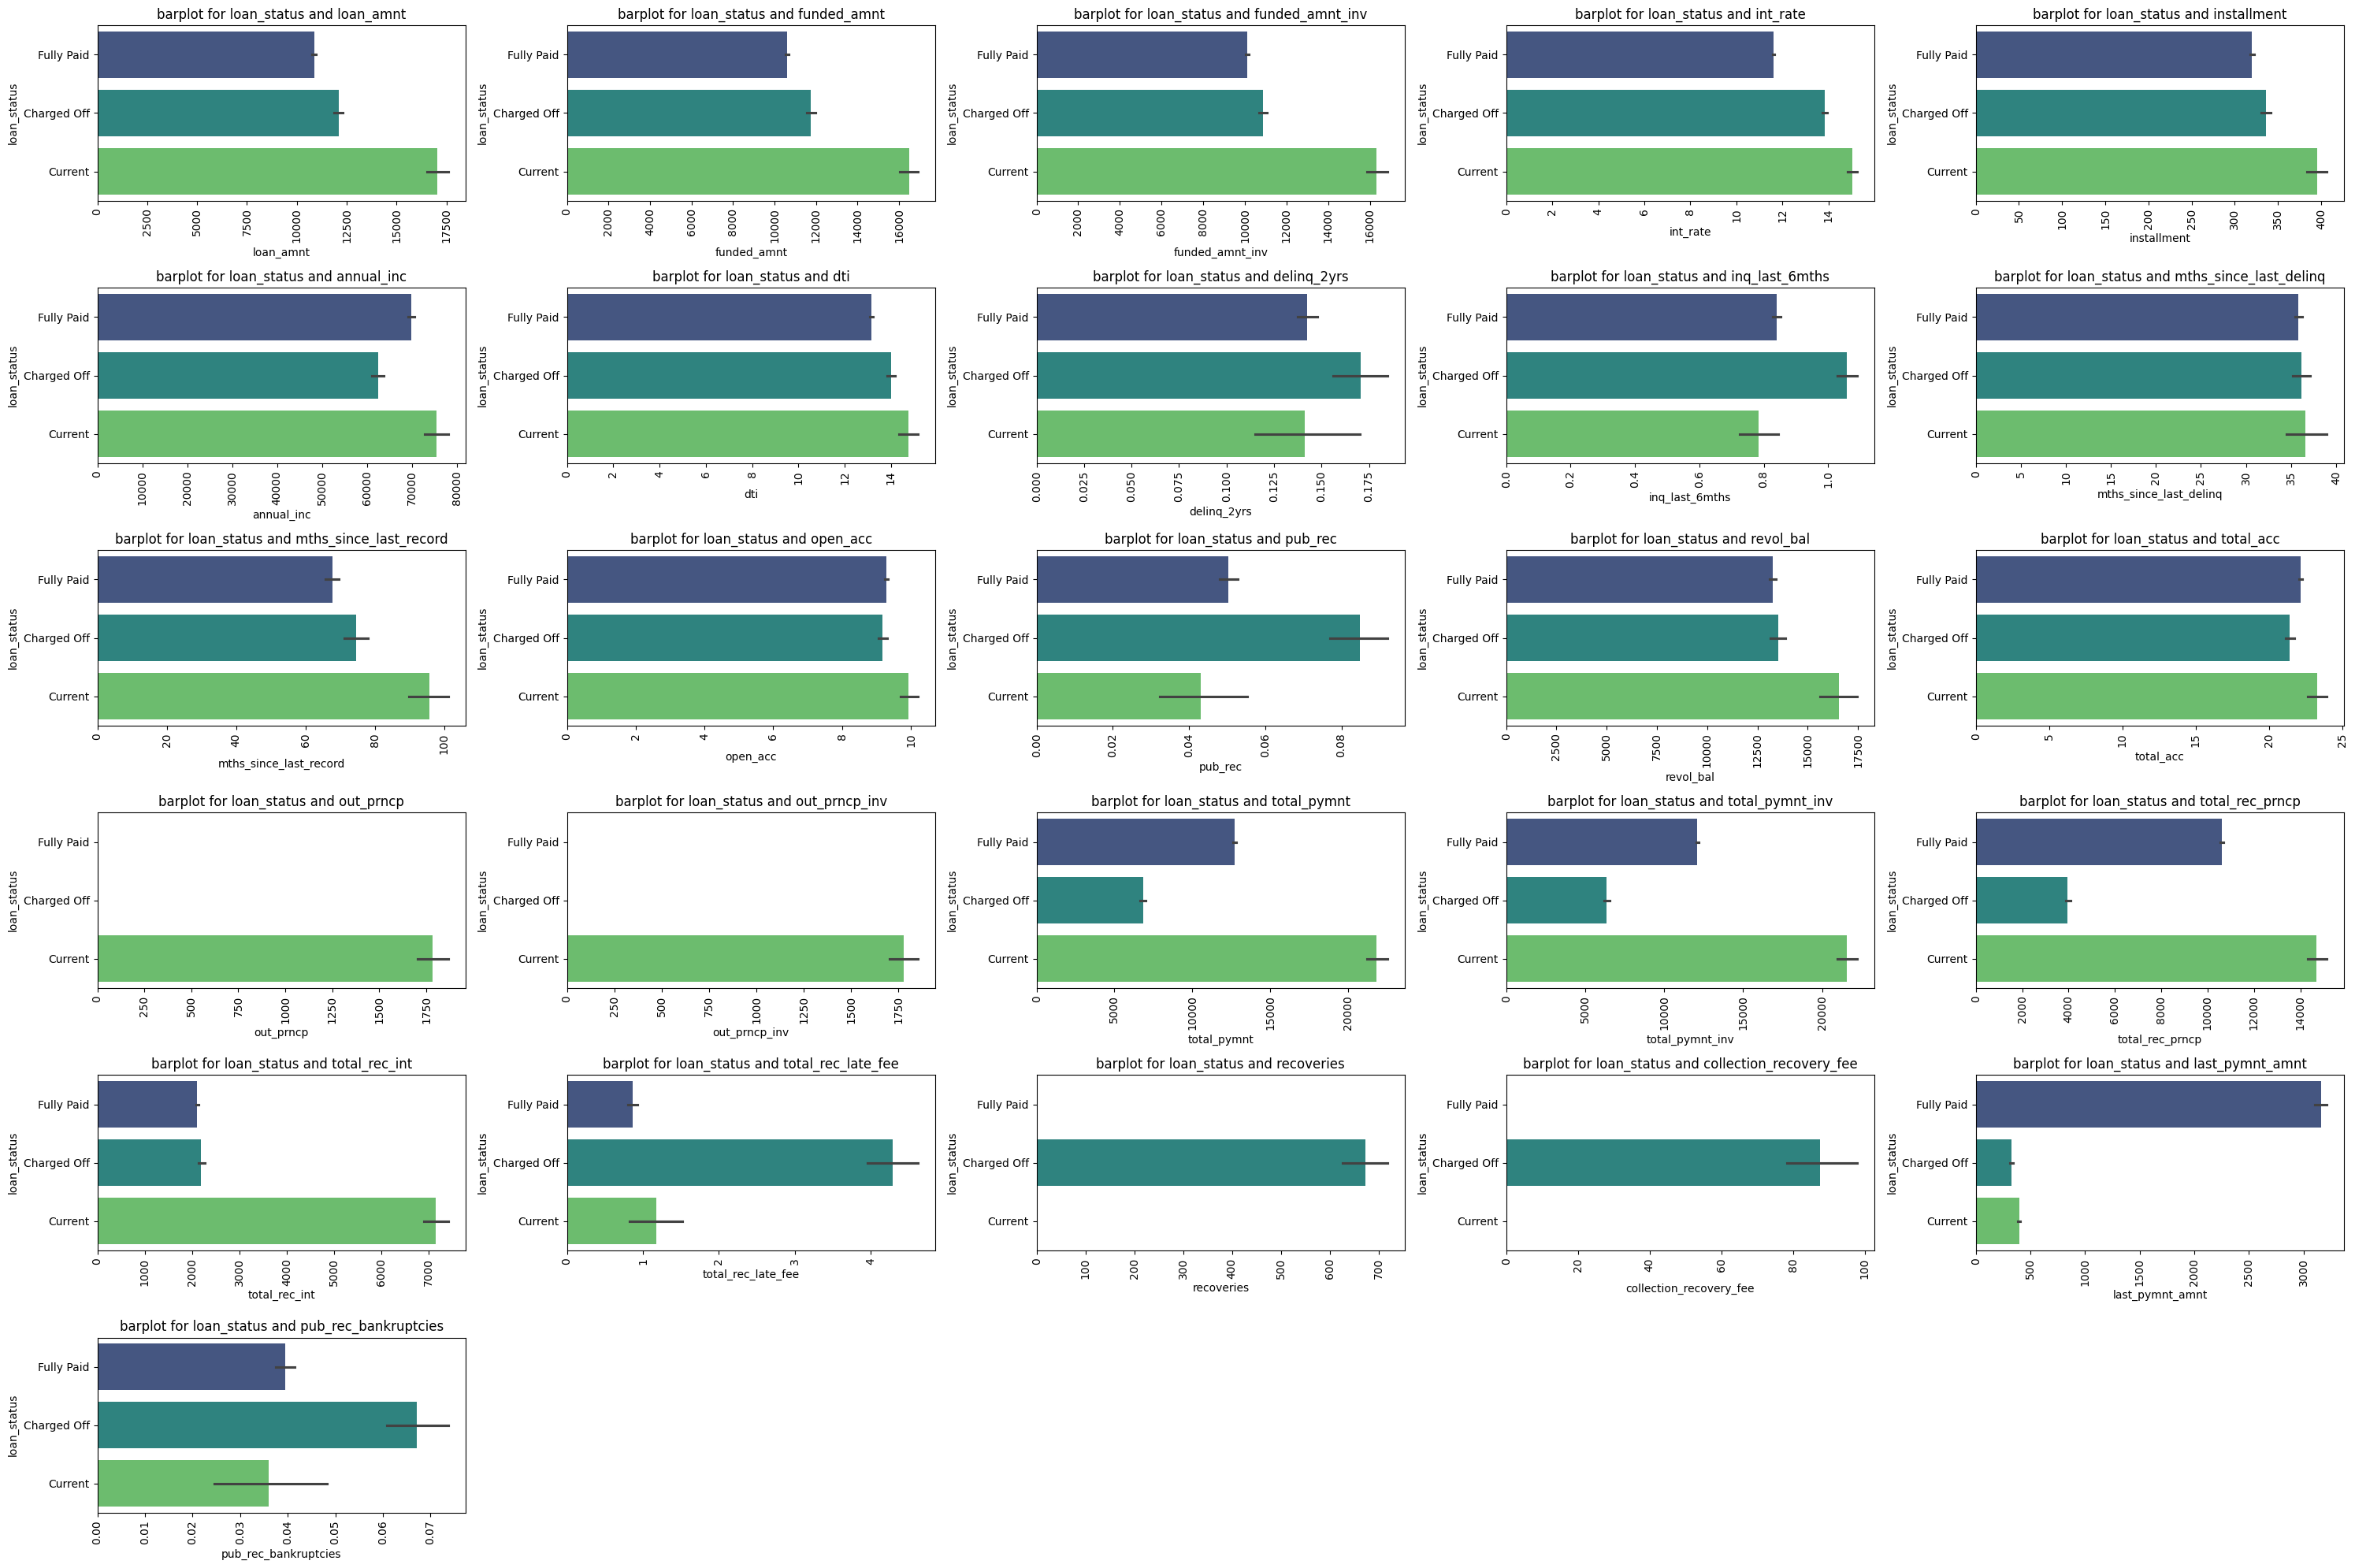

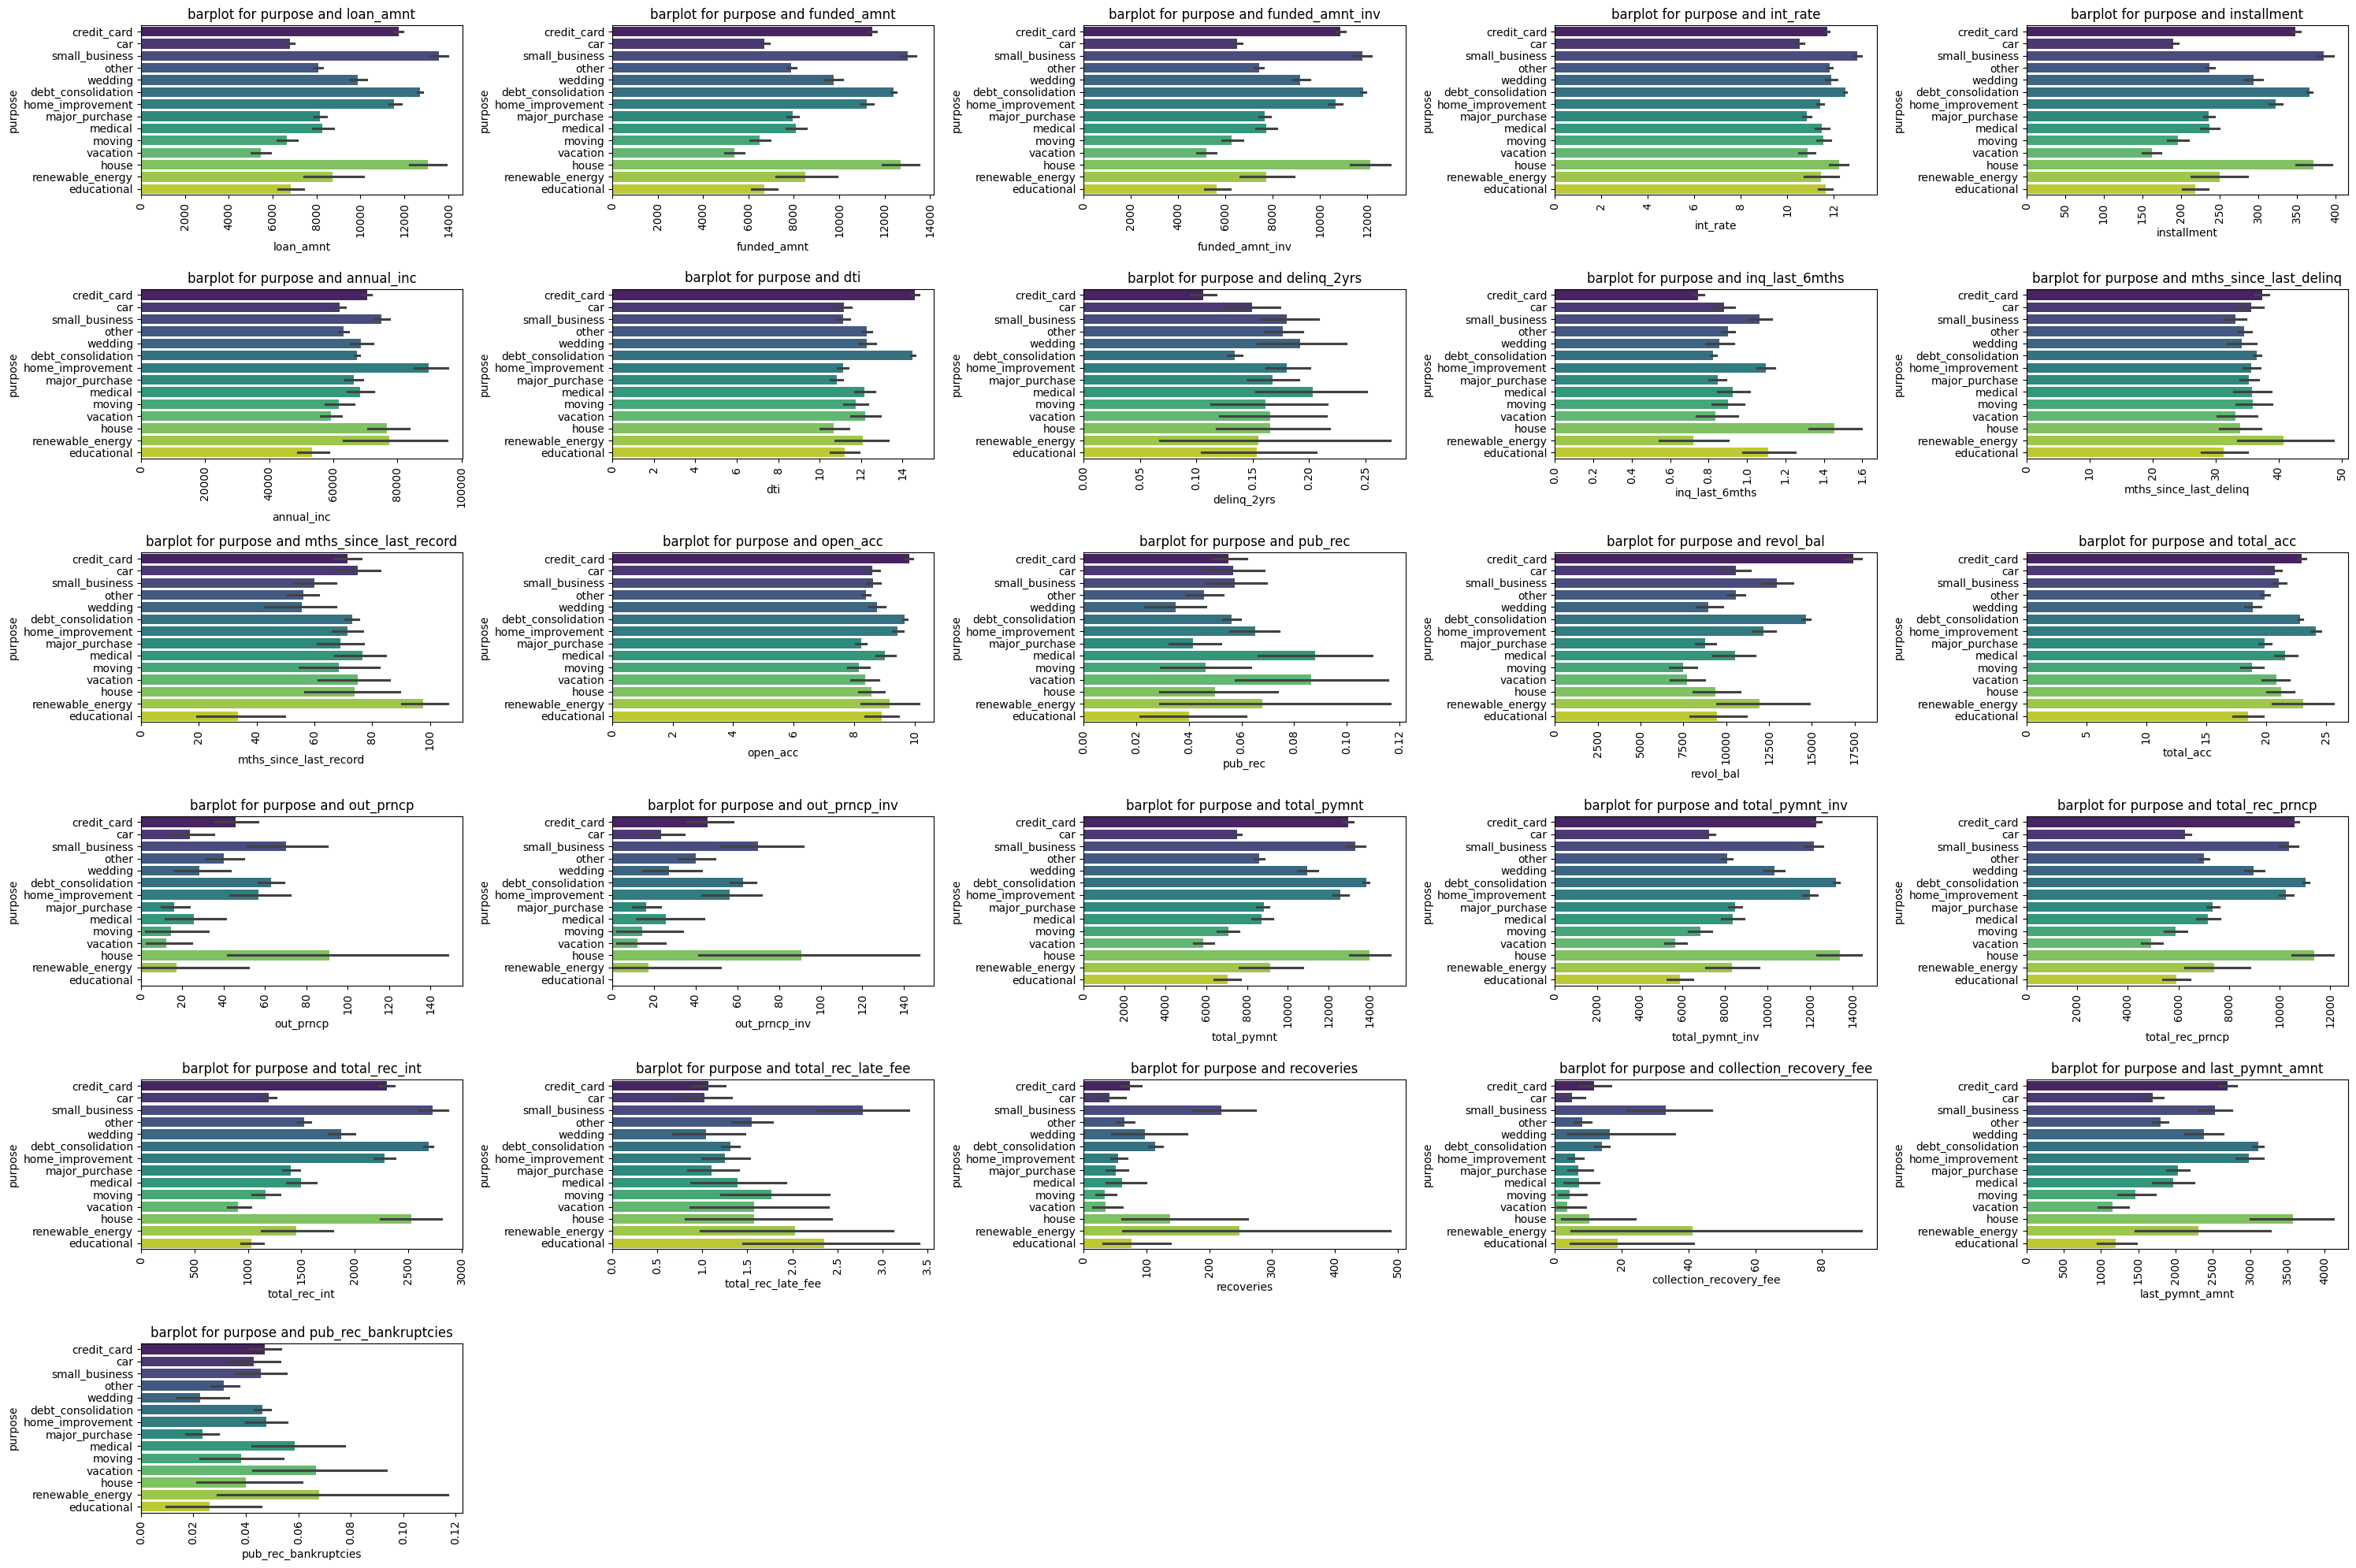

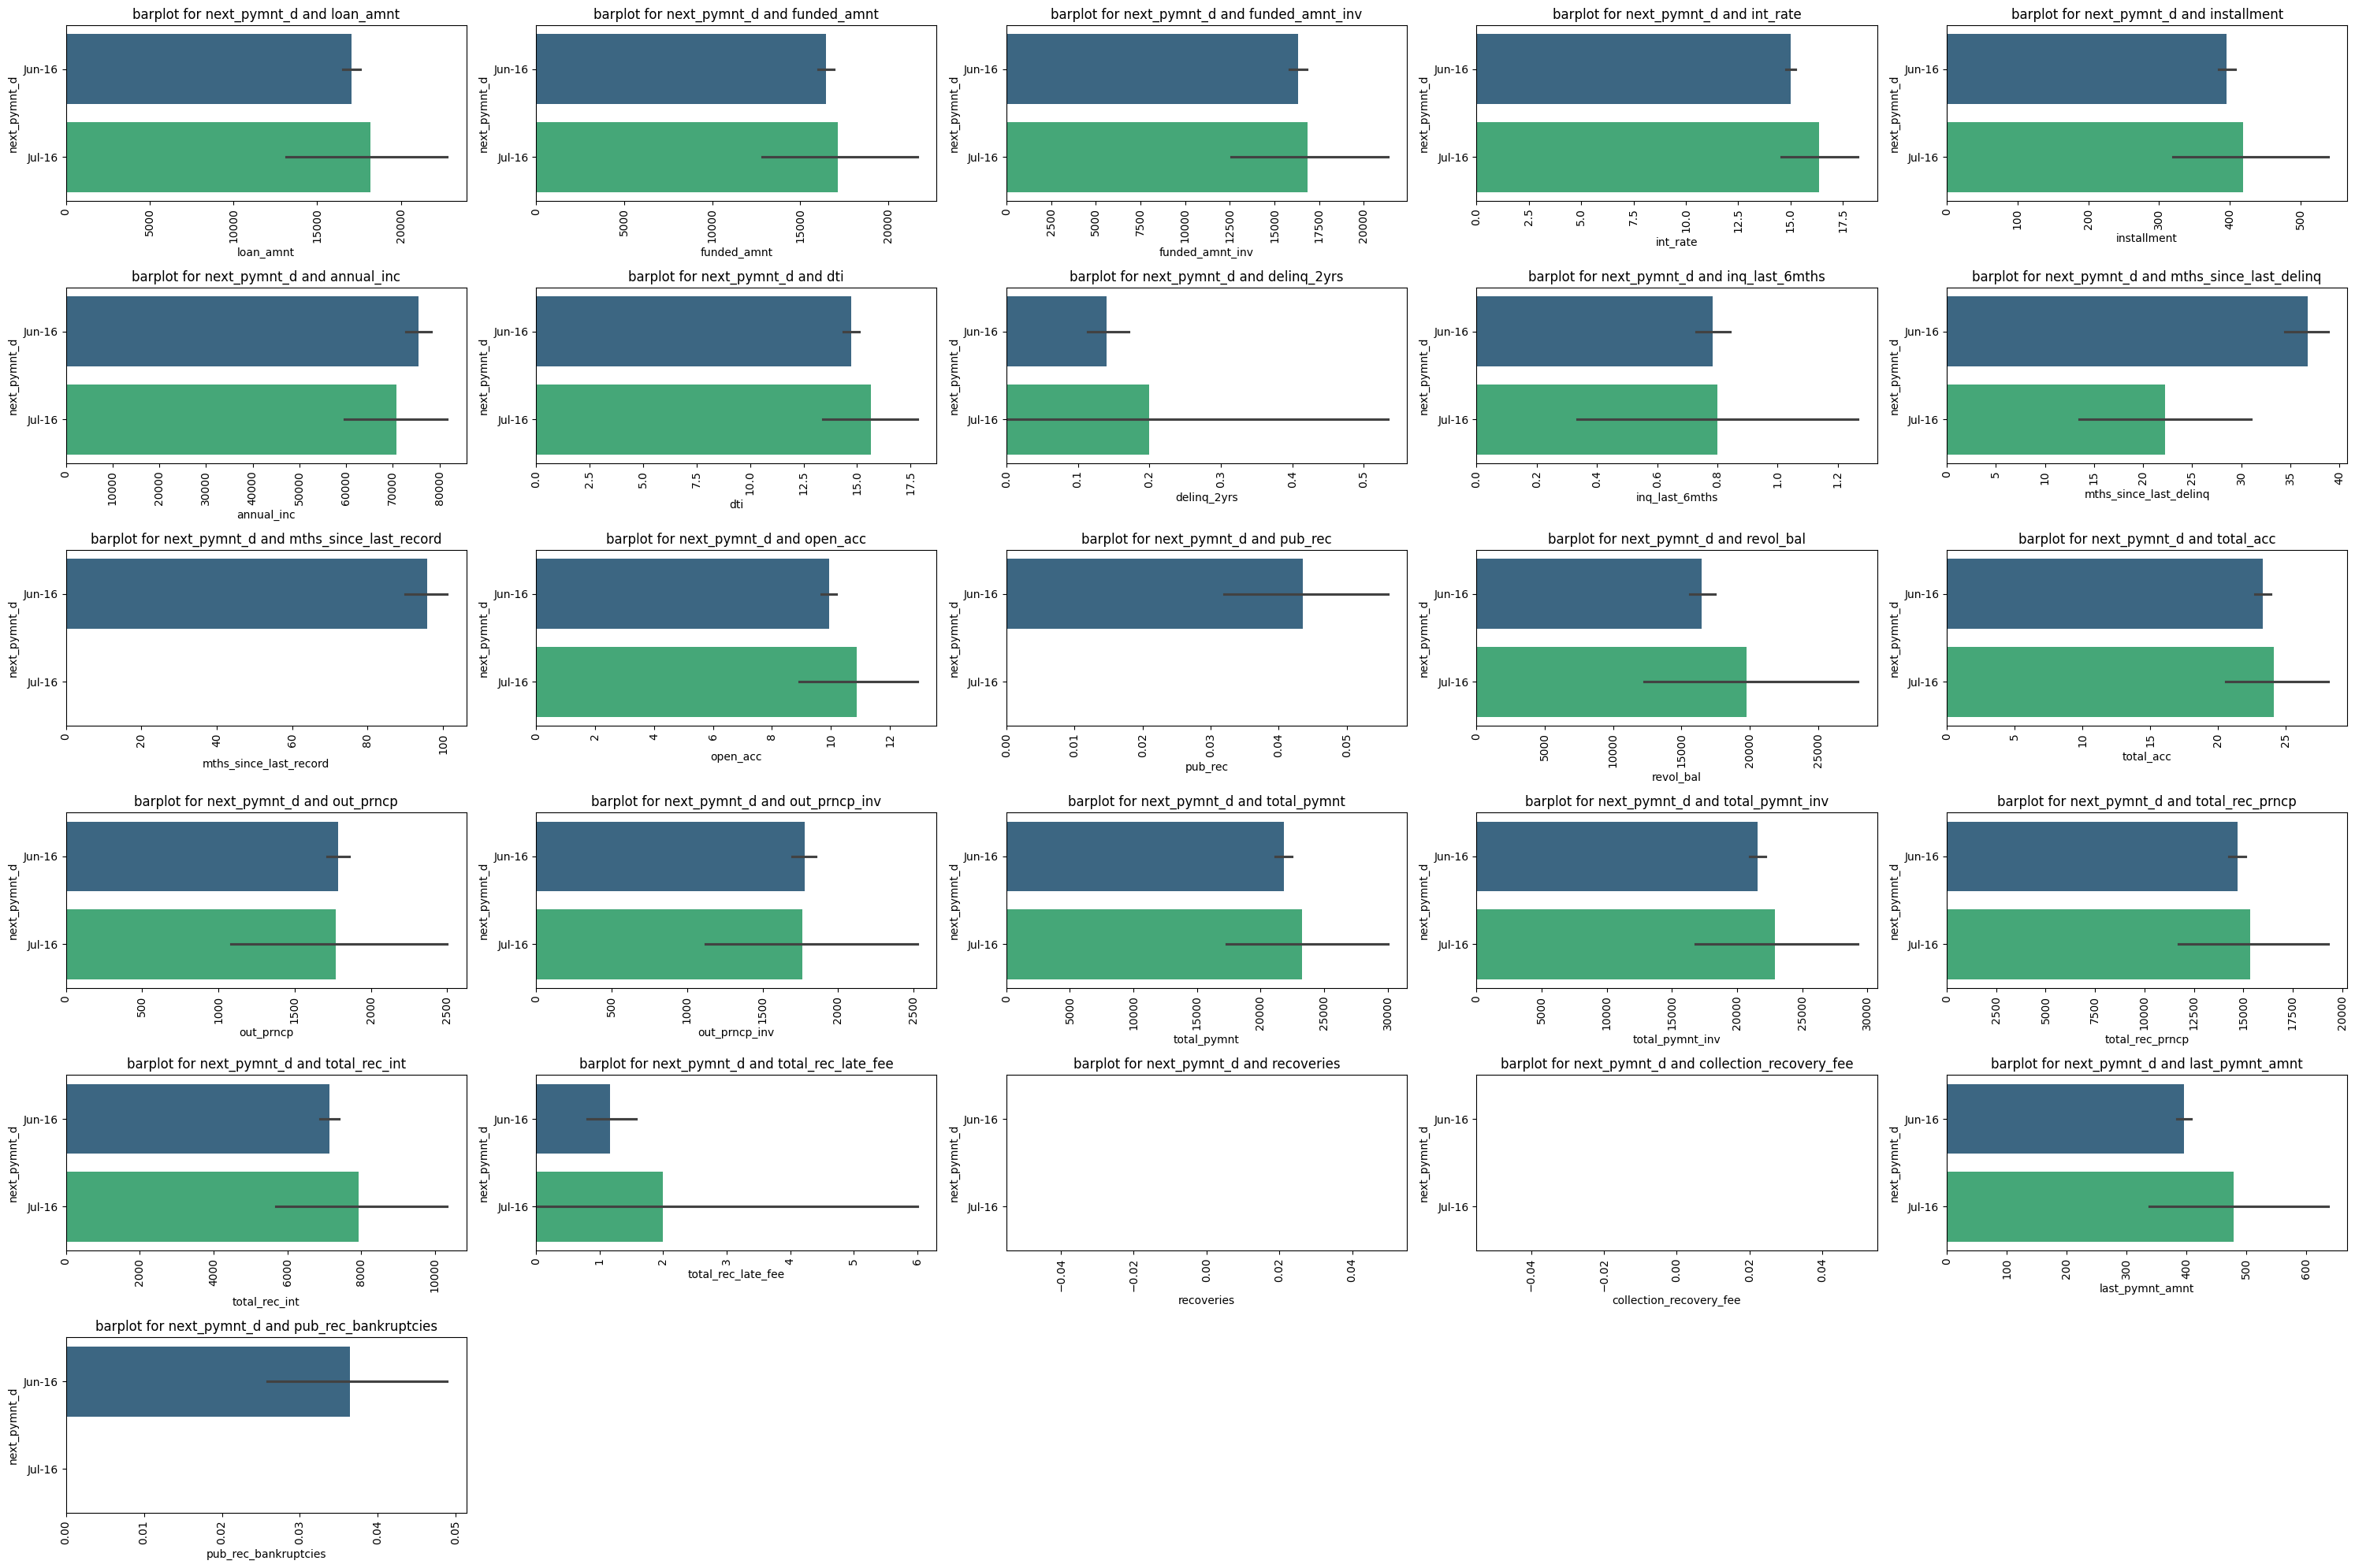

In [295]:
# Calculate the optimal number of rows and columns for the subplots
n_rows = int(np.ceil(np.sqrt(len(continuous_features))))
n_cols = int(np.ceil(len(continuous_features) / n_rows))

for var in low_cardinal_categorical_features:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 20))  # Adjust figsize as needed

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    for i, feature in enumerate(continuous_features):
        sns.barplot(data=df, y=var, x=feature, palette="viridis", ax=axes[i])
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
        axes[i].set_xlabel(feature)
        axes[i].set_title(f"barplot for {var} and {feature}")  # Optional: Add subplot titles

    # Remove any empty subplots
    for i in range(len(continuous_features), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()  # Improve layout for better readability
    
    plt.savefig(var + '_barplot.png', dpi=300)
    
    plt.show()

In [ ]:
verification_status , loan_status,  loan_amnt 

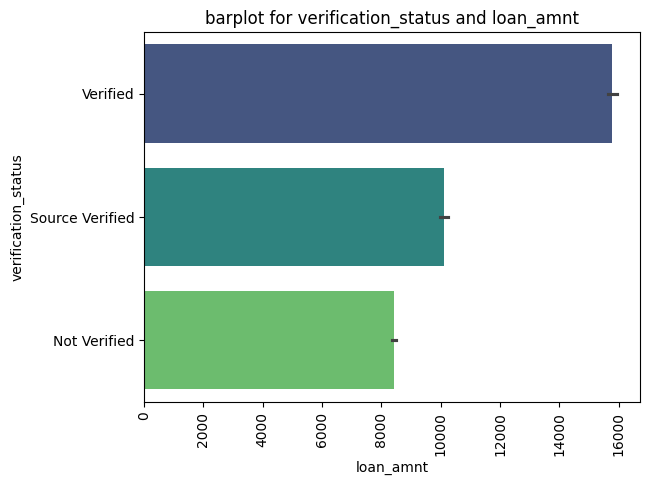

In [266]:
plt.clf()
sns.barplot(data=df, y="verification_status", x="loan_amnt", palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("loan_amnt")
plt.title(f"barplot for verification_status and loan_amnt")
plt.show()

It can be seen that verified users get more loan amount

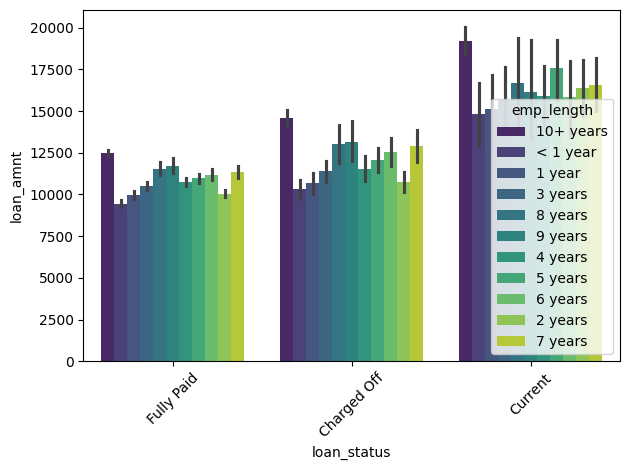

In [297]:
sns.barplot(
    data=df,
    x="loan_status",
    y="loan_amnt",
    hue="emp_length",
    palette="viridis"
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

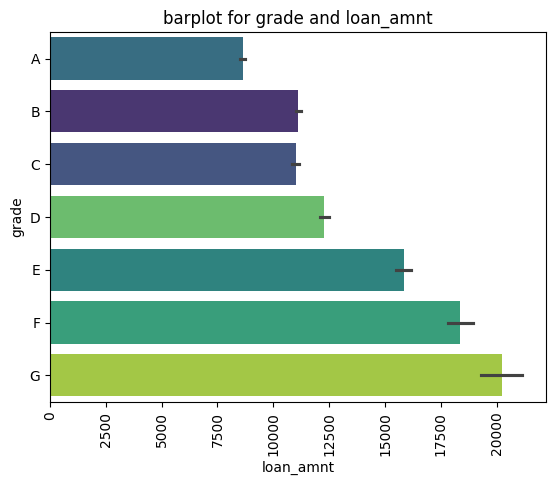

In [277]:
plt.clf()
sns.barplot(data=df, y="grade", x="loan_amnt", palette="viridis",order=["A", "B", "C", "D","E","F","G"], hue="grade")
plt.xticks(rotation=90)
plt.xlabel("loan_amnt")
plt.title(f"barplot for grade and loan_amnt")
plt.show()

Higher the amount, Grade increases by alphabetical order

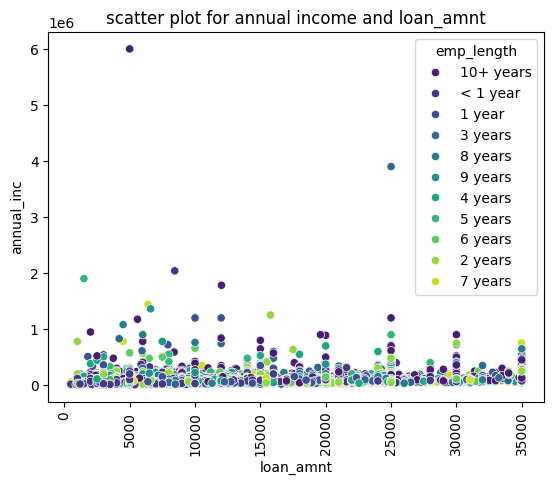

In [293]:
plt.clf()
sns.scatterplot(data=df, y="annual_inc", x="loan_amnt", hue="emp_length", palette="viridis", legend=True)
plt.xticks(rotation=90)
plt.xlabel("loan_amnt")
plt.ylabel("annual_inc")
plt.title(f"scatter plot for annual income and loan_amnt")
plt.show()

As the above doesnt show good correlation, let's remove some outliers from and check

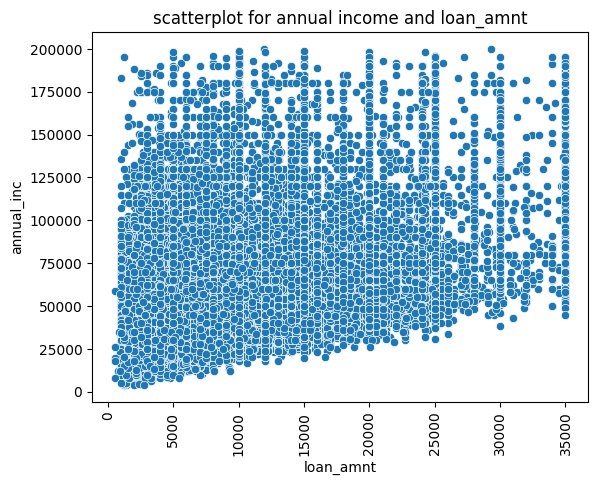

In [292]:
plt.clf()
sns.scatterplot(data=df[df["annual_inc"] < 200000], y="annual_inc", x="loan_amnt", palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("loan_amnt")
plt.ylabel("annual_inc")
plt.title(f"scatterplot for annual income and loan_amnt")
plt.show()

There is no actual extreme positive correlation between income and loan amount, as we can see from the above graph